# Create map pickles

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import warnings
warnings.filterwarnings('ignore')
import time
from matplotlib.patches import Polygon 
import matplotlib.image as mpimg
import pandas as pd

%matplotlib inline

In [2]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 

In [3]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

### Mn model surface map

In [4]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut', 'Beaufort Sea']
lon_features1 = [-139, -57, -57, \
                -125.5, -124.5, -106.5, -149.5]
lat_features1 = [88, 79, 78, \
                66.1, 65.5, 65.2, 77.5]

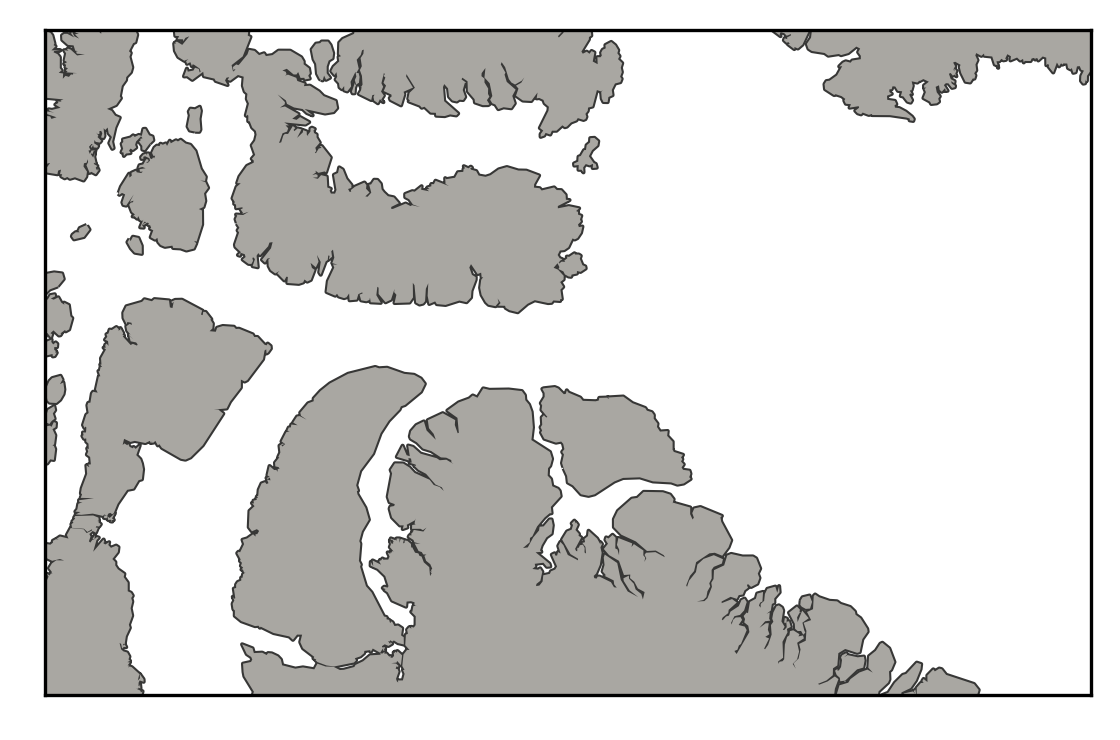

In [20]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='stere',lat_0 = 74, lon_0 = -80, resolution='i', width=1.1e6, height=0.7e6, ax=ax1)

land_color = '#a9a7a2'
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/easternCAA.pickle','wb'))

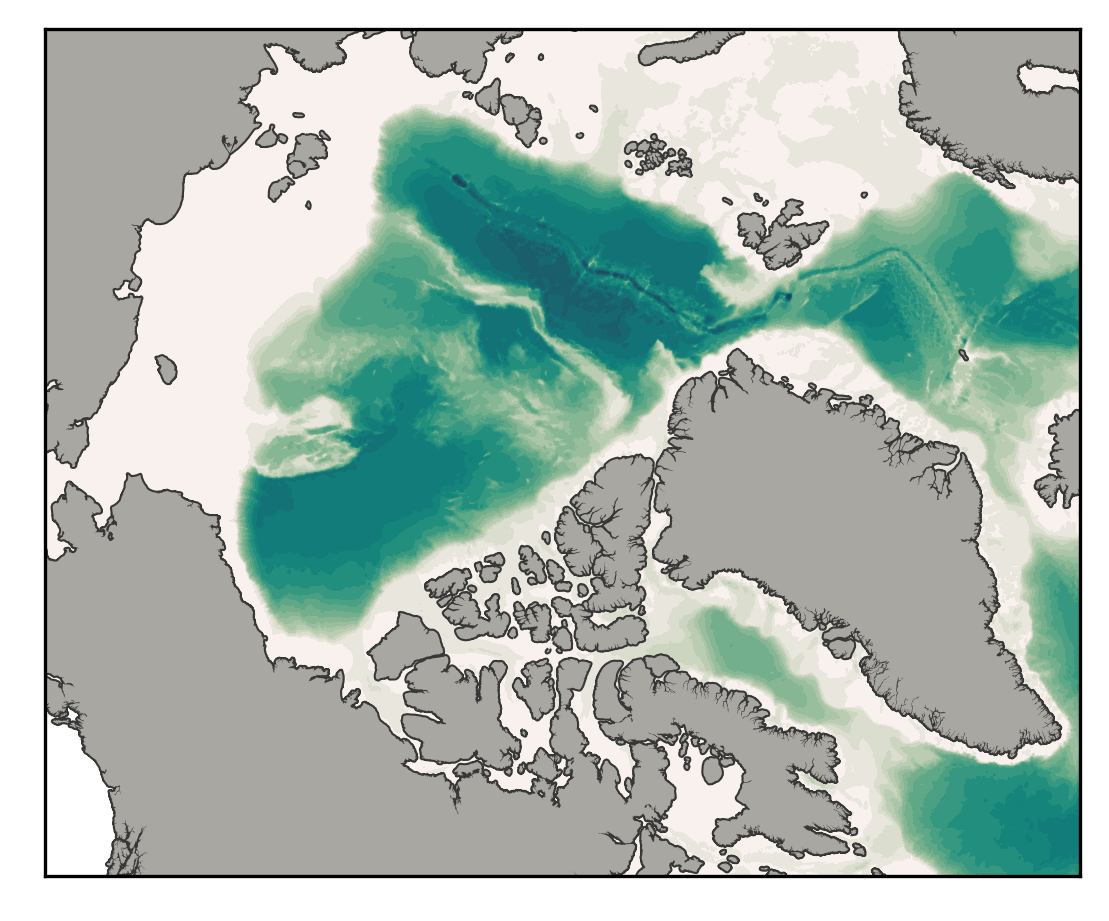

In [15]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='stere',lat_0 = 84, lon_0 = -95, resolution='i', width=5.5e6, height=4.5e6, ax=ax1)

land_color = '#a9a7a2'
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/AO-map.pickle','wb'))

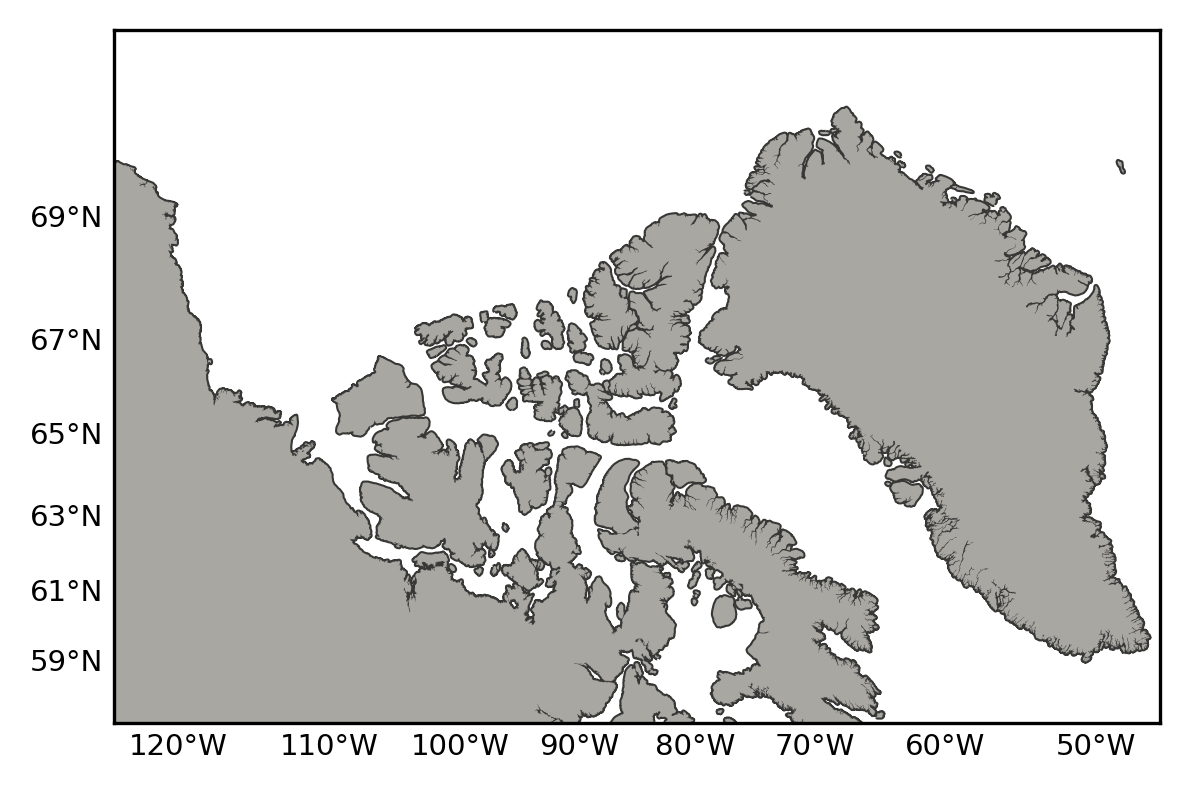

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=7)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=7)

land_color = '#a9a7a2'
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# x_model, y_model = proj1(lon, lat)
# bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','wb'))

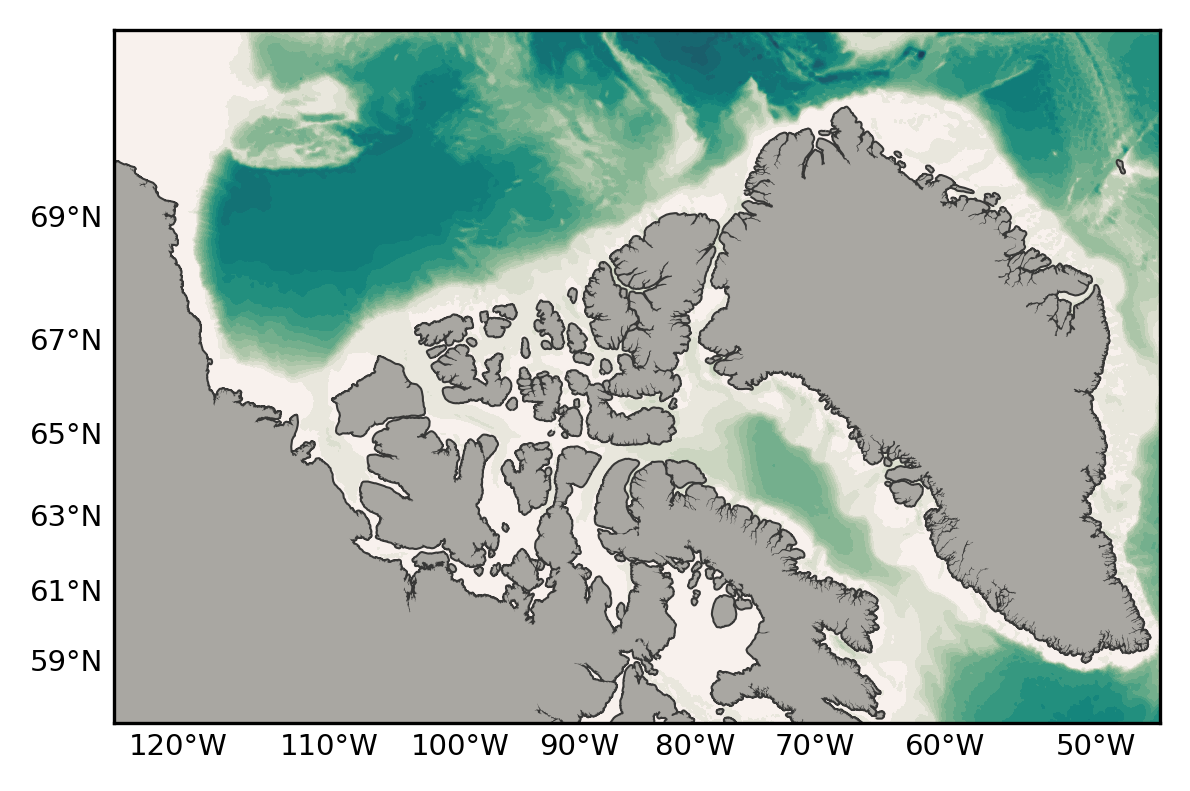

In [13]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=7)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=7)

land_color = '#a9a7a2'
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','wb'))

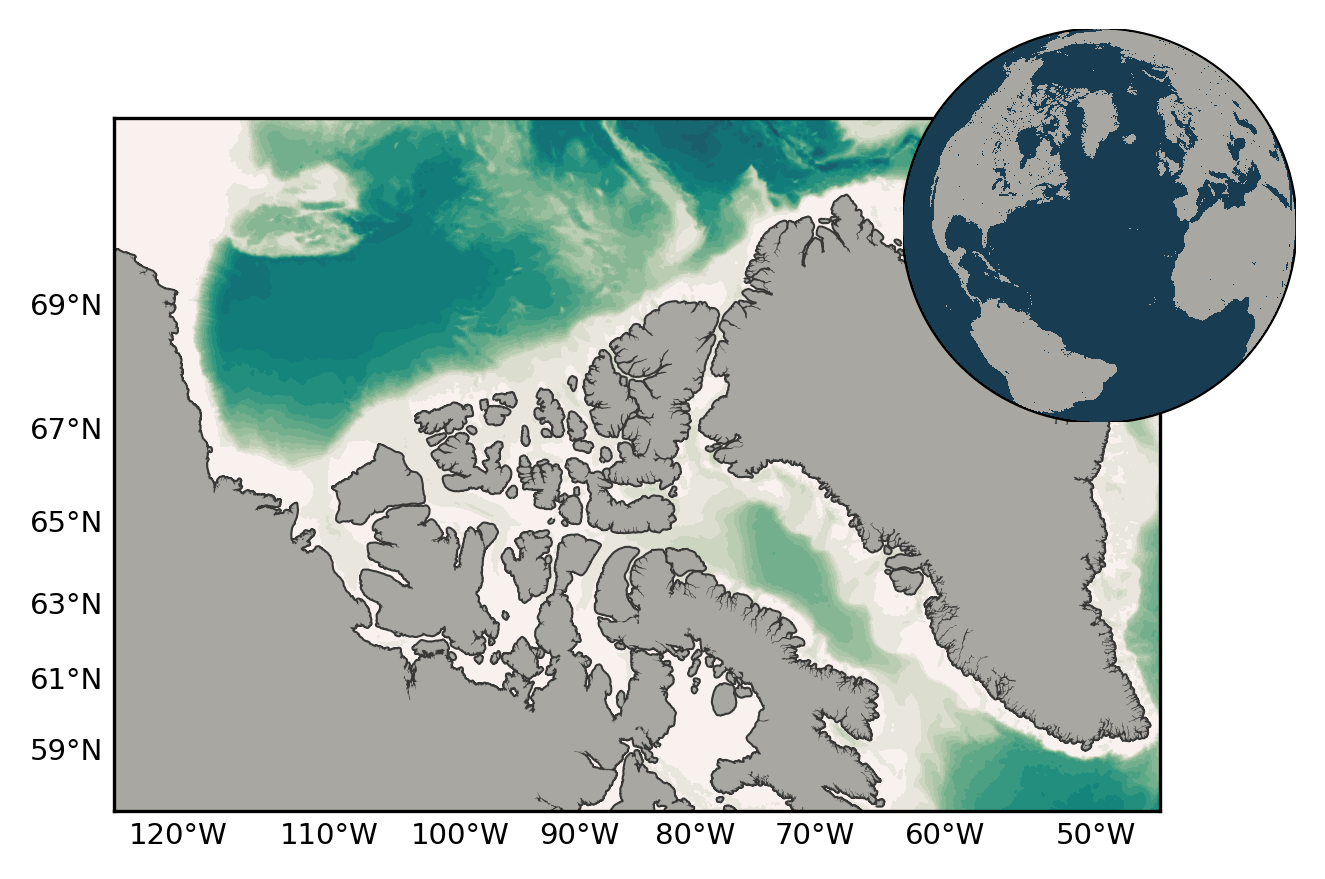

In [10]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=7)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=7)

land_color = '#a9a7a2'
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = land_color, ocean_color="#183C51", resolution = 'h',zorder=2) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map-globe.pickle','wb'))

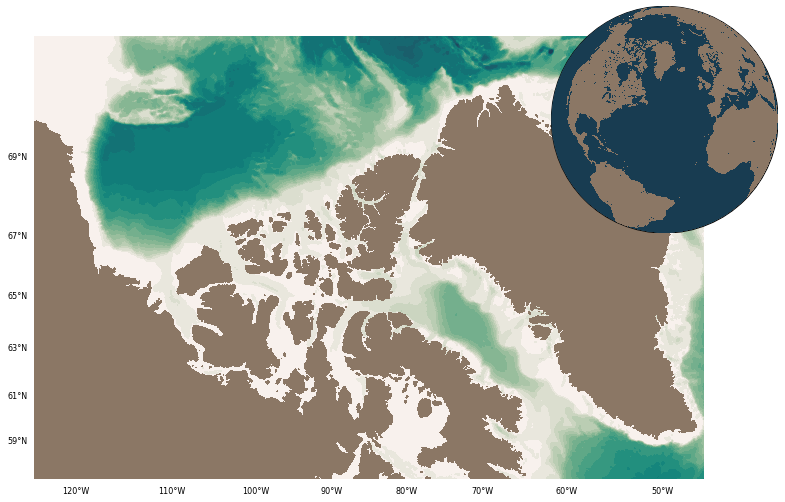

In [5]:
fig, ax1 = plt.subplots(figsize=(12,9))

# proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax1)
proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

# nv = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/nunavut.png')
# nwt = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/NWT.png')

# ax3 = fig.add_axes([0.36, 0.16, 0.06, 0.04]) #nunavut
# ax3.axis('off')
# ax3.imshow(nv)
# ax4 = fig.add_axes([0.13, 0.29, 0.10, 0.04]) #northwest territories
# ax4.axis('off')
# ax4.imshow(nwt)

# # features:
# textx, texty = proj1(lon_features1, lat_features1)
# for i in range(len(features)):
#     if features[i] == 'Kalaallit Nunaat':
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', color='w', zorder=4)
#     elif features[i] == 'Beaufort Sea':
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', color='k', zorder=4)
#     else:
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', fontstyle='italic', color='w',\
#                 zorder=4)

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map-globe.pickle','wb'))

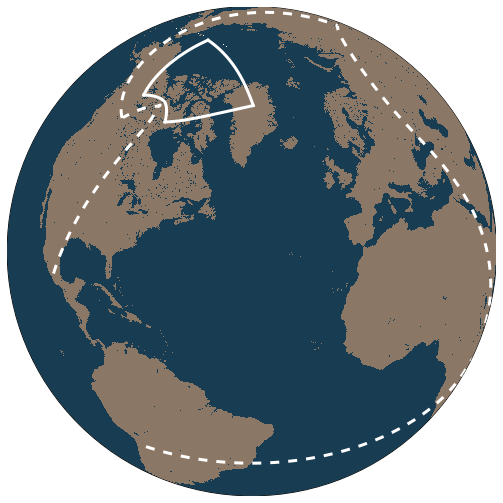

In [8]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax1)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

imin, imax = 1480, 2180
jmin, jmax = 160, 800
grid_reso  = 10
x, y = proj2(lon, lat)

# Sub-domain
proj2.plot(x[imin:imax,jmin], y[imin:imax,jmin], 'w-', lw=3, zorder=3)
proj2.plot(x[imin:imax,jmax], y[imin:imax,jmax], 'w-', lw=3, zorder=3)
proj2.plot(x[imin,jmin:jmax], y[imin,jmin:jmax], 'w-', lw=3, zorder=3)
proj2.plot(x[imax,jmin:jmax], y[imax,jmin:jmax], 'w-', lw=3, zorder=3)
# full domain
proj2.plot(x[460:-1:grid_reso,0]   , y[460:-1:grid_reso,0]        , 'w--', lw=3,zorder=3, dashes=(3, 3))
proj2.plot(x[0,370:-1:grid_reso]   , y[0,370:-1:grid_reso]        , 'w--', lw=3,zorder=3, dashes=(3, 3))
proj2.plot(x[100:-1:grid_reso,-1]  , y[100:-1:grid_reso,-1]       , 'w--', lw=3,zorder=3, dashes=(3, 3))
proj2.plot(x[-1,0:-1:grid_reso]    , y[-1,0:-1:grid_reso]         , 'w--', lw=3,zorder=3, dashes=(3, 3))

fig.savefig('/ocean/brogalla/GEOTRACES/figures/ANHA12_globe.png', bbox_inches='tight', dpi=300)

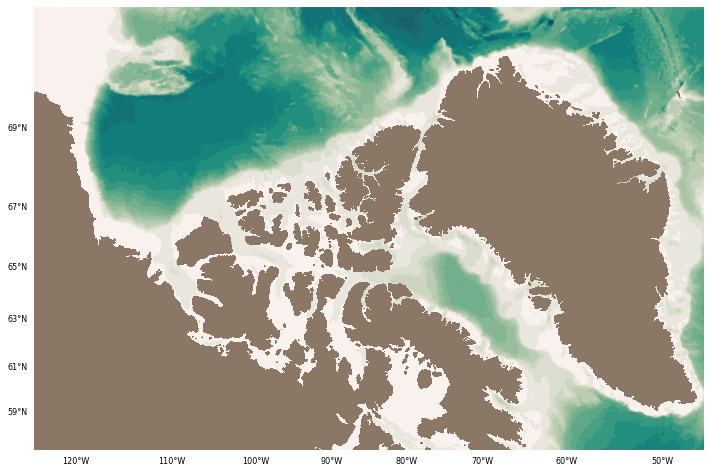

In [5]:
fig, ax1 = plt.subplots(figsize=(12,9))

# proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax1)
proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','wb'))

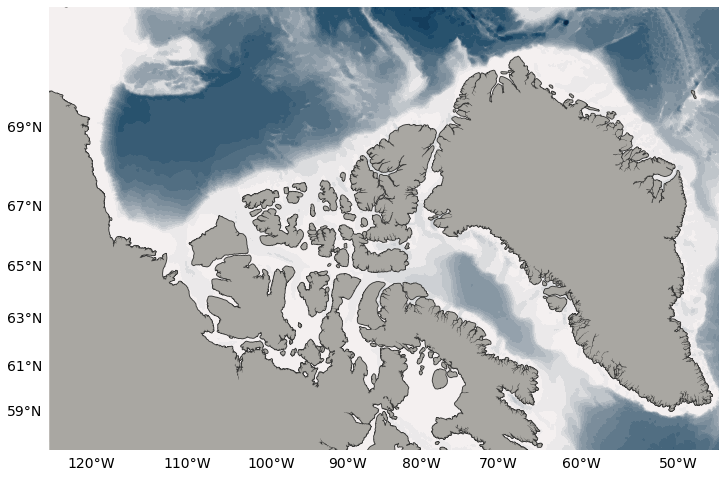

In [5]:
fig, ax1 = plt.subplots(figsize=(12,9))

# proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax1)
proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

land_color = '#a9a7a2'

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);
# proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap([land_color]), zorder=2)
# p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
#             facecolor=land_color,edgecolor=land_color) 
# plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.diff_r, vmin=-5000, vmax=5000, zorder=1)

# ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
# proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
# proj2.drawmapboundary(fill_color='white')
# proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

# nv = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/nunavut.png')
# nwt = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/NWT.png')

# ax3 = fig.add_axes([0.36, 0.16, 0.06, 0.04]) #nunavut
# ax3.axis('off')
# ax3.imshow(nv)
# ax4 = fig.add_axes([0.13, 0.29, 0.10, 0.04]) #northwest territories
# ax4.axis('off')
# ax4.imshow(nwt)

# # features:
# textx, texty = proj1(lon_features1, lat_features1)
# for i in range(len(features)):
#     if features[i] == 'Kalaallit Nunaat':
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', color='w', zorder=4)
#     elif features[i] == 'Beaufort Sea':
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', color='k', zorder=4)
#     else:
#         ax1.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', fontstyle='italic', color='w',\
#                 zorder=4)

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map2.pickle','wb'))

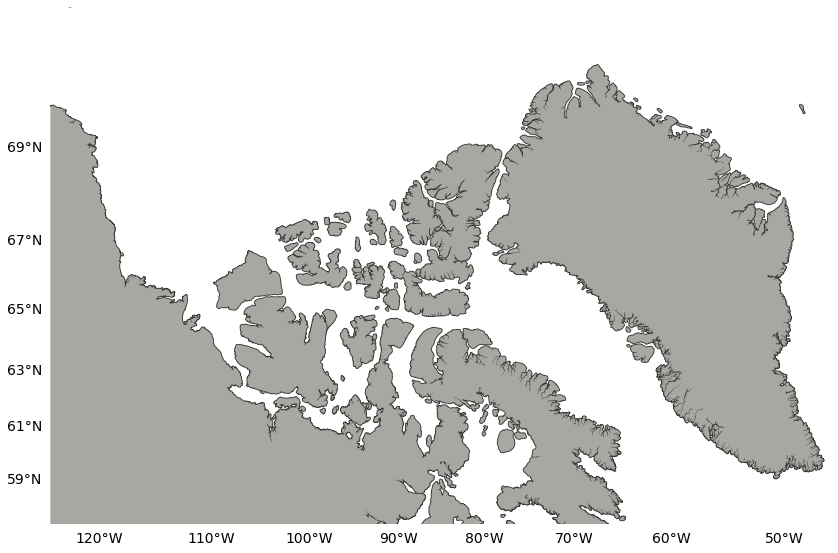

In [6]:
fig, ax1 = plt.subplots(figsize=(14,11))

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

land_color = '#a9a7a2'

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-reference2.pickle','wb'))

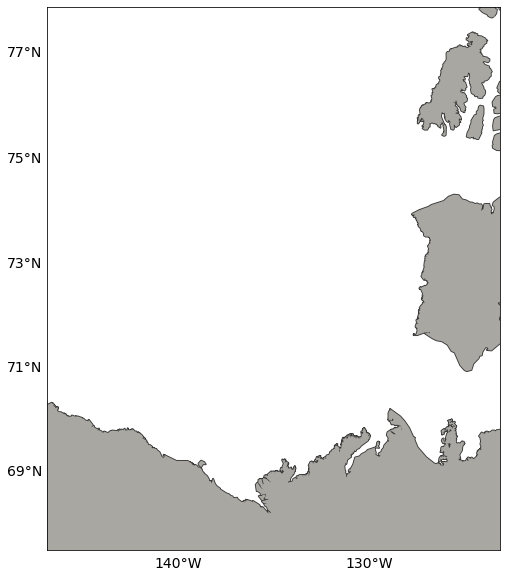

In [17]:
fig, ax1 = plt.subplots(figsize=(10,10))

proj1 = Basemap(projection='stere',lat_0 = 73.3, lon_0 = -135, resolution='i', width=1.0e6, height=1.2e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-170),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

land_color = '#a9a7a2'

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-Canada-Basin.pickle','wb'))

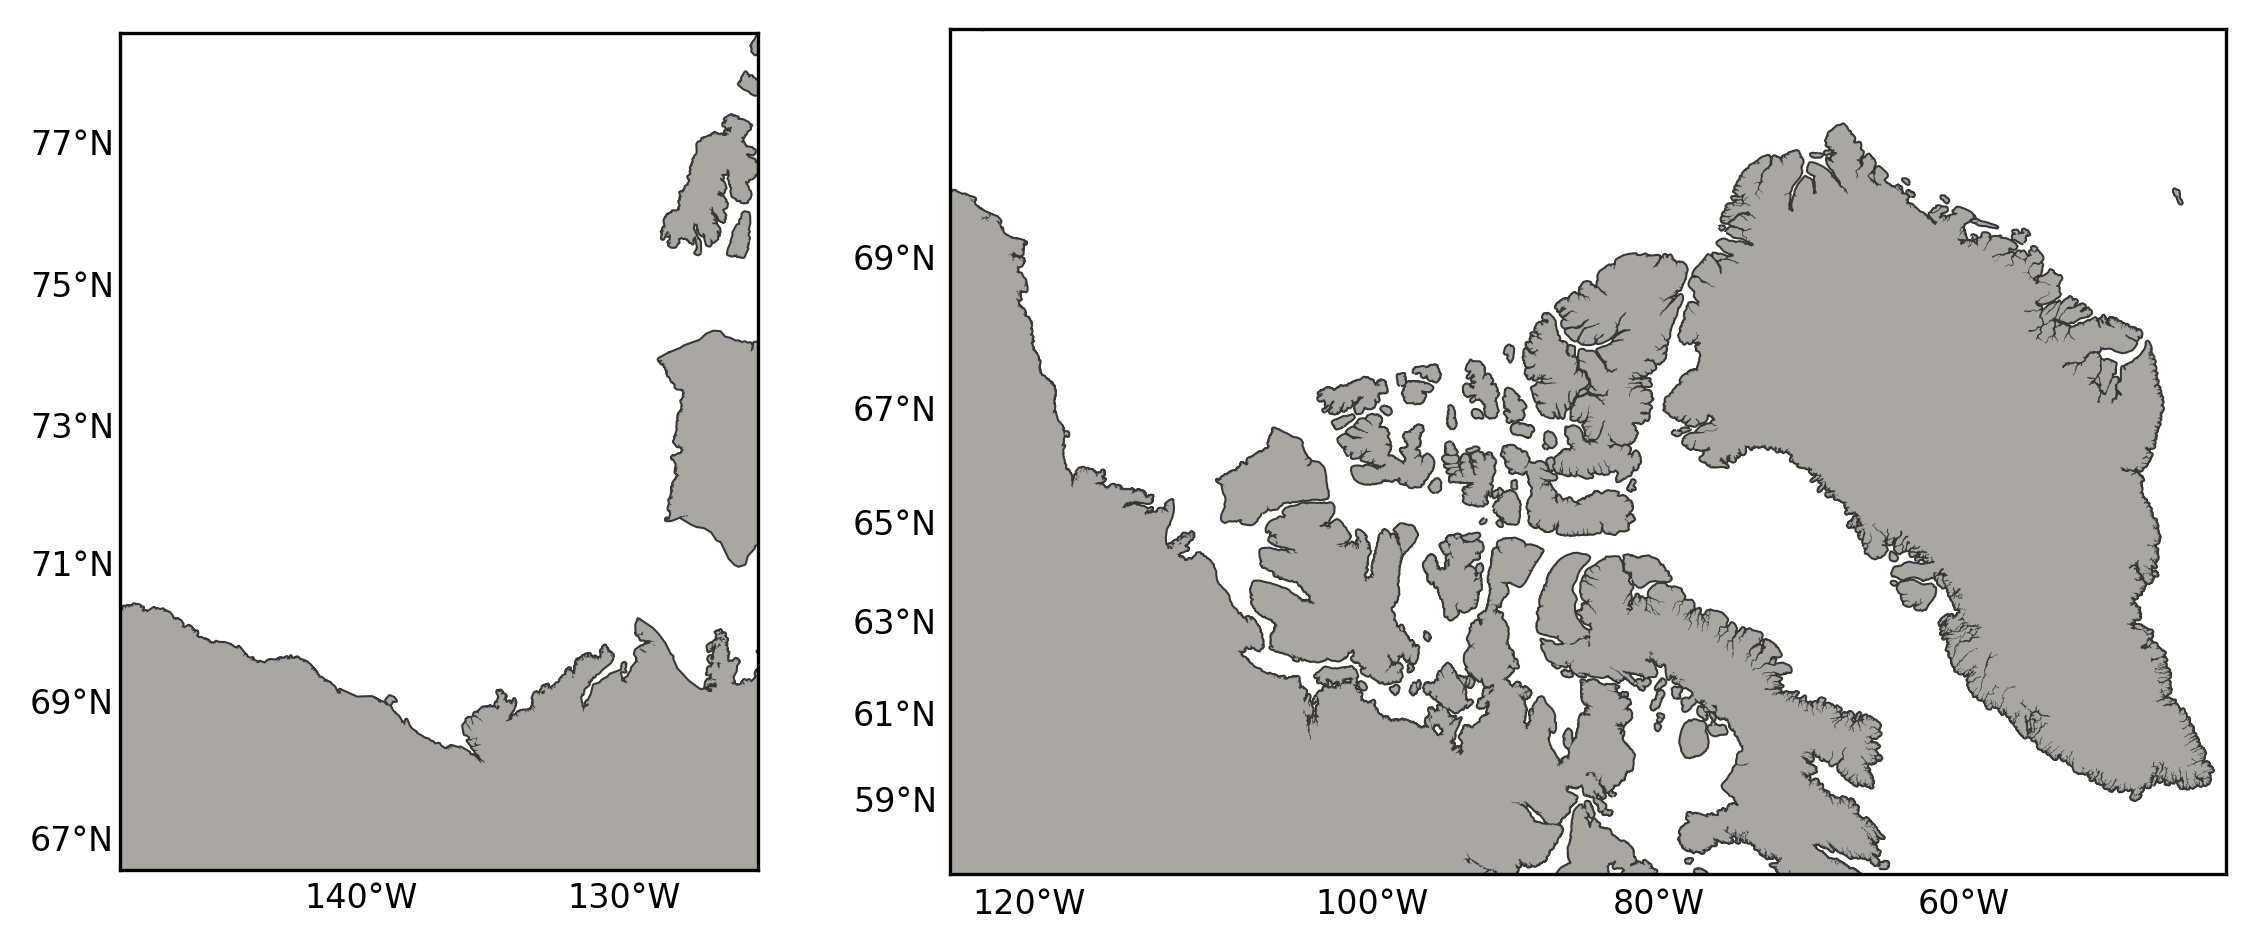

In [44]:
fig, ax1 = plt.subplots(1,2, figsize=(9.055, 3.74), dpi=300, gridspec_kw={'width_ratios': [1, 2]})

land_color = '#a9a7a2'

#--- Left plot ---
proj1 = Basemap(projection='stere',lat_0 = 73.3, lon_0 = -137, resolution='i', width=1.06e6, height=1.39e6, ax=ax1[0])
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-170),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

#--- Right plot ---
proj2 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1[1])
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj2.drawmeridians(np.arange(int(-140),int(-30),20),labels=[0,0,0,1], linewidth=0.0, fontsize=8)
proj2.drawcoastlines(color='#373736', linewidth=1.0)
proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1, proj2), open('/ocean/brogalla/GEOTRACES/pickles/mn-eval-combined.pickle','wb'))

In [ ]:
fig, ax1 = plt.subplots(figsize=(7,10))

proj1 = Basemap(projection='stere',lat_0 = 78.2, lon_0 = -80, resolution='i', width=0.9e6, height=1.1e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

land_color = '#a9a7a2'

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/nares-zoom.pickle','wb'))

In [6]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values
profile_colors = ['#ff4949', '#01b9ff']

<IPython.core.display.Javascript object>


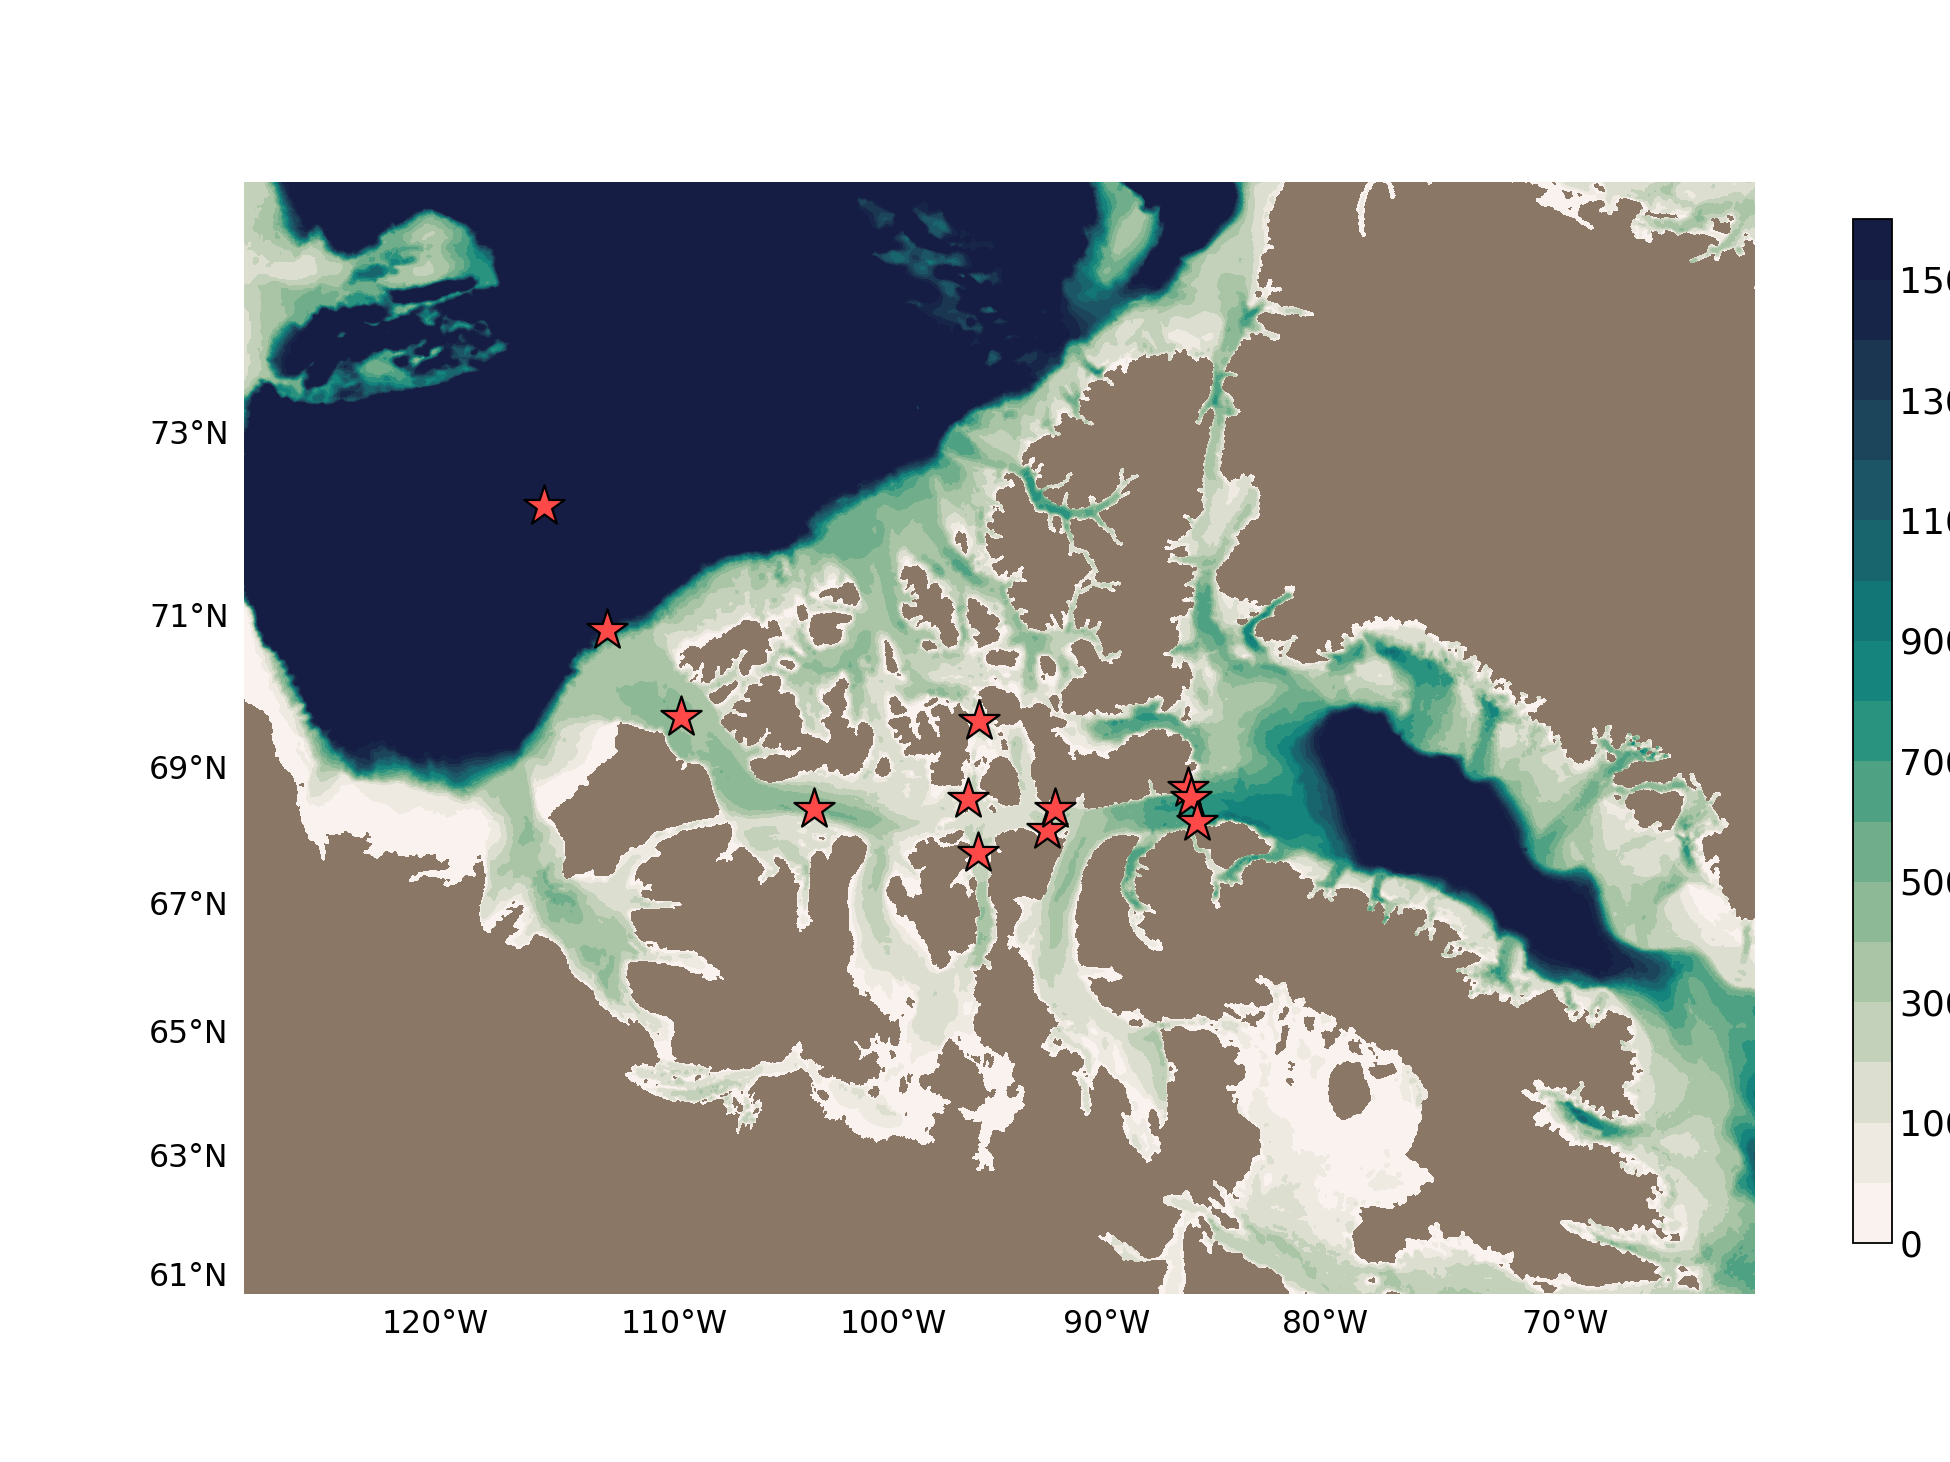

In [10]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1 = Basemap(projection='stere',lat_0 = 76.0, lon_0 = -95, resolution='i', width=3.4e6, height=2.5e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
land=proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 170000),(1.258e6, 170000),(1.258e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

clevels=[0,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,4000]
bath   = proj1.contourf(x_model, y_model, mesh_bathy, levels=clevels,\
                        cmap=cmocean.cm.tempo, vmin=0, vmax=1500, zorder=1)


x_GEOTRACES, y_GEOTRACES = proj1(lons[5:17], lats[5:17]) # leave out CB4, BB and K stations
ax1.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=350,zorder=5, edgecolor='k', color=profile_colors[0])

cbaxes = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)
ax1.set_frame_on(False)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/evalmap.png',bbox_inches='tight')
# pickle the class instance.
# pickle.dump((fig, ax1, proj1, ax2, proj2), open('surface-land-map-globe.pickle','wb'))

<IPython.core.display.Javascript object>


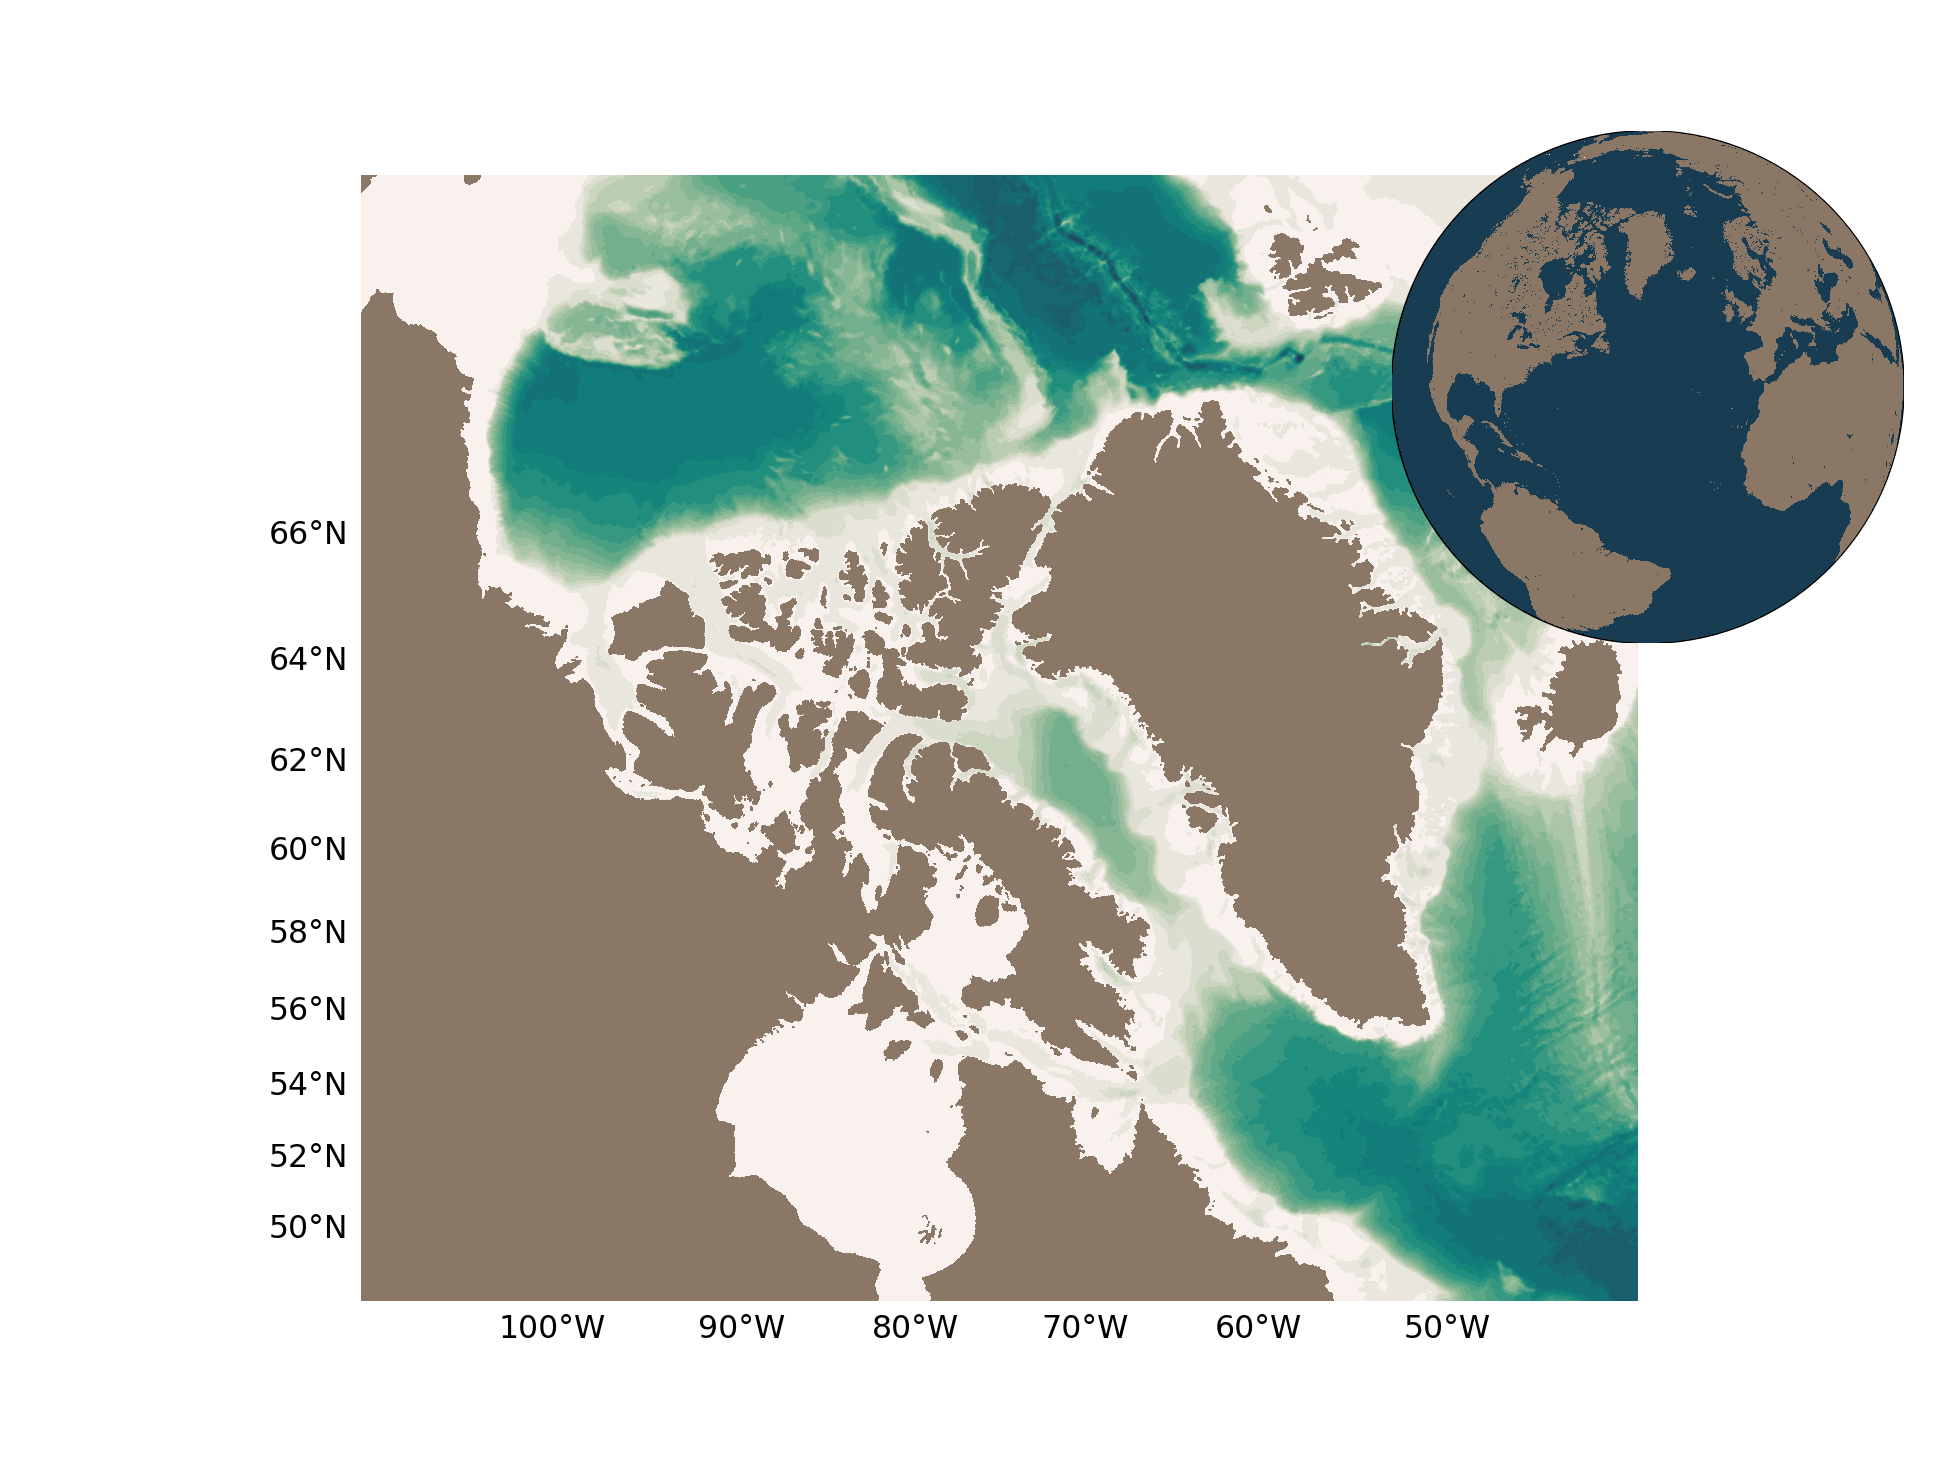

In [7]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1=Basemap(projection='stere',lat_0 = 74, lon_0 = -75, resolution='i', width=5.1e6, height=4.5e6, ax=ax1)
proj1.drawparallels(np.arange(int(50),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 2.0e6),(1.3e6, 2.0e6),(1.3e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax2   = fig.add_axes([0.67, 0.56, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb-map-globe.pickle','wb'))

<IPython.core.display.Javascript object>


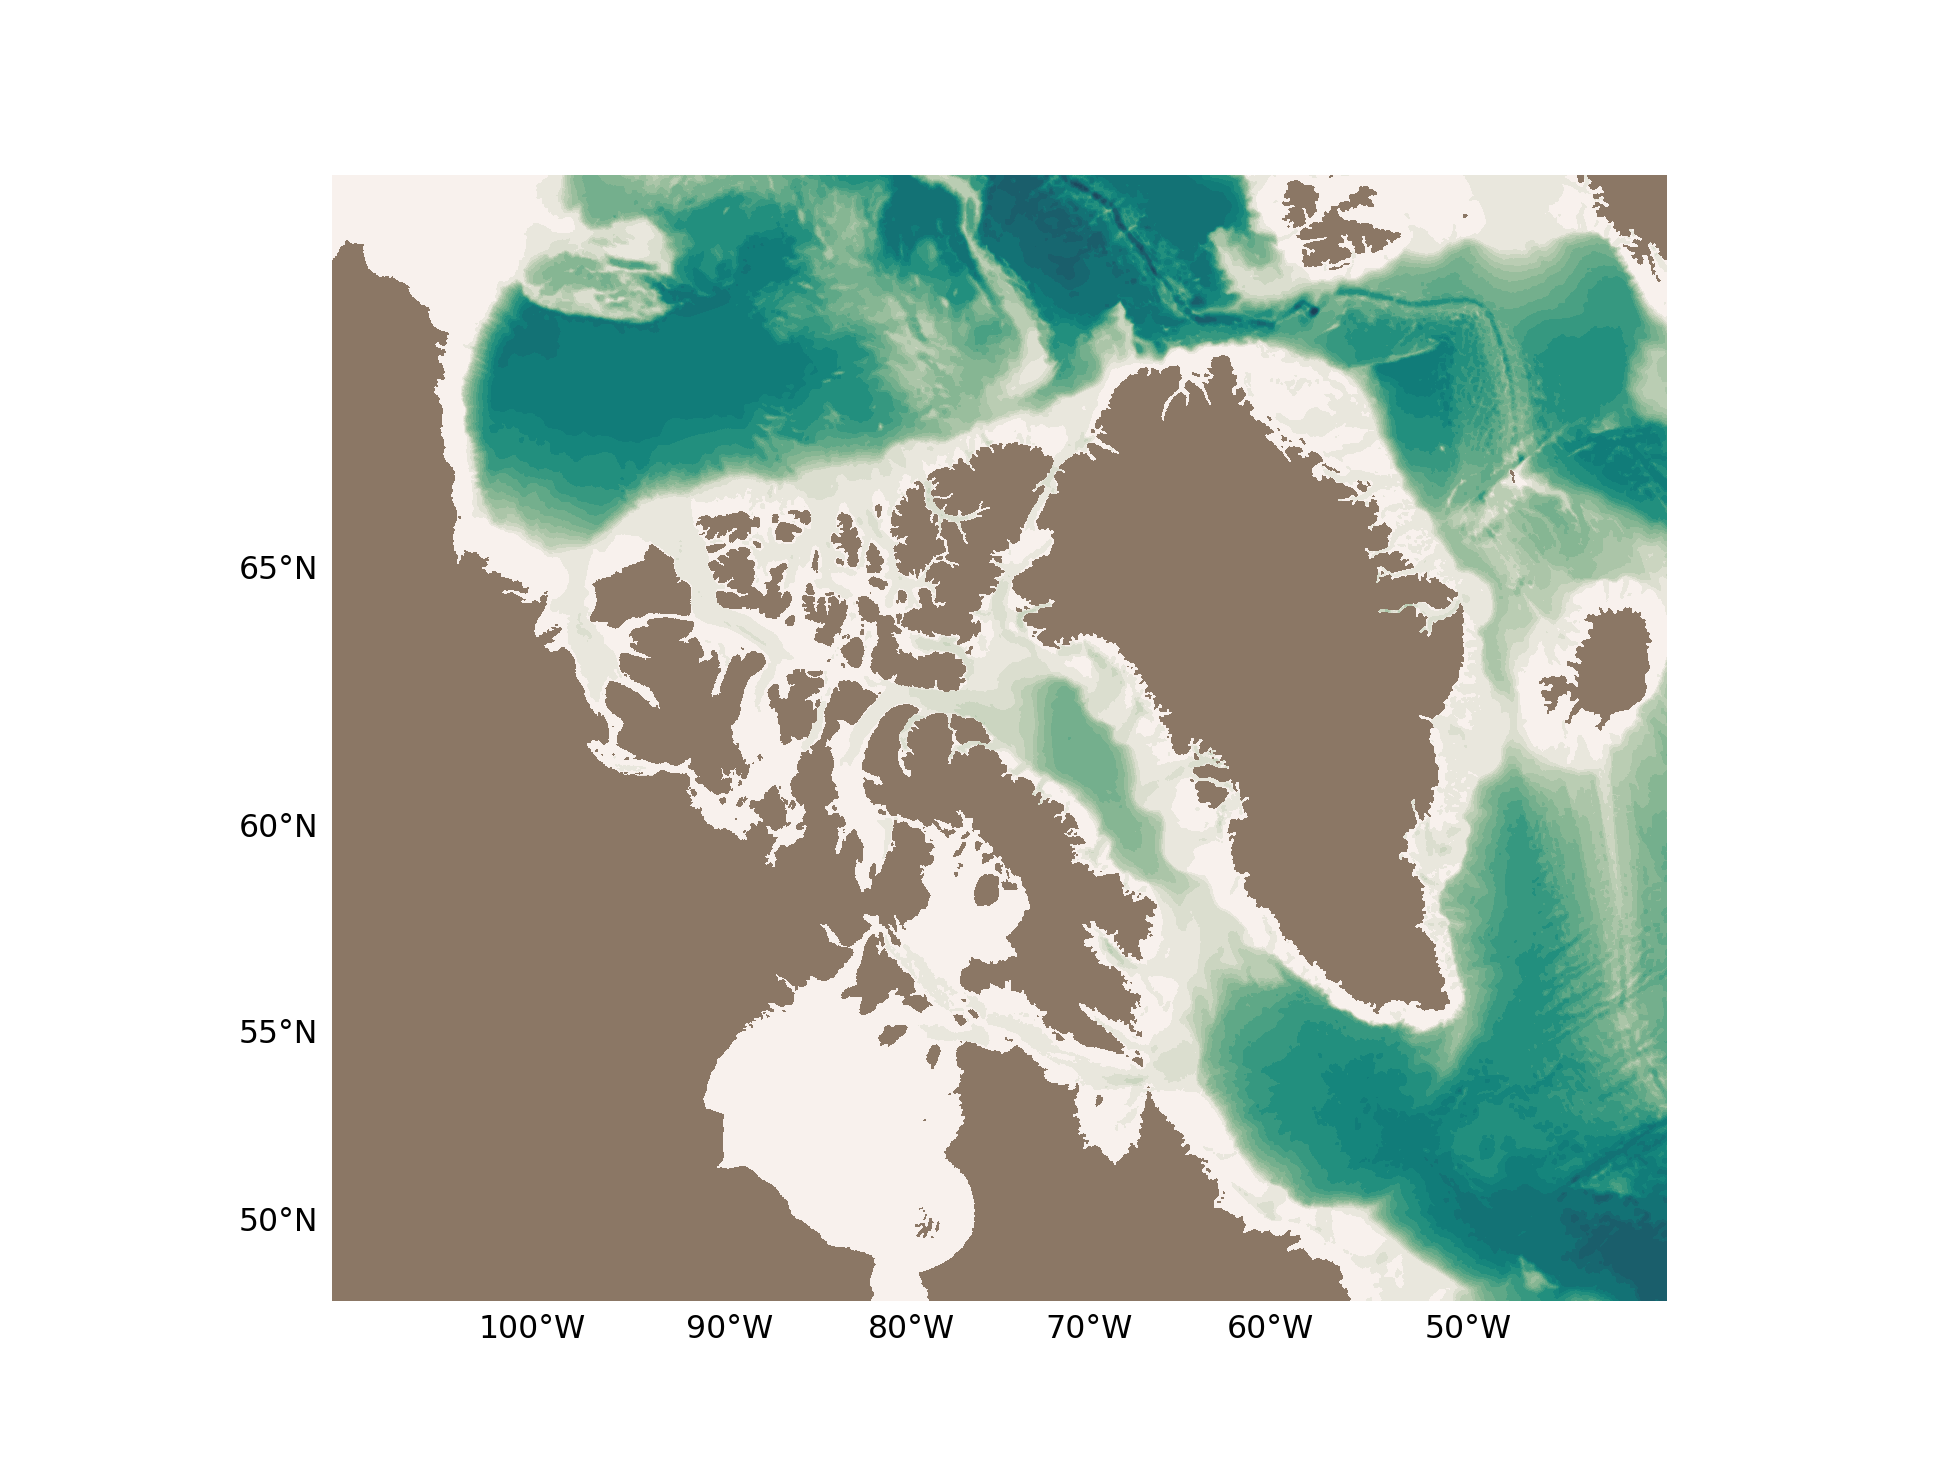

In [8]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1=Basemap(projection='stere',lat_0 = 73, lon_0 = -75, resolution='i', width=5.1e6, height=4.3e6, ax=ax1)
proj1.drawparallels(np.arange(int(50),int(90),5),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 2.0e6),(1.3e6, 2.0e6),(1.3e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# ax2   = fig.add_axes([0.67, 0.56, 0.35, 0.35])
# proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
# proj2.drawmapboundary(fill_color='white')
# proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb-map.pickle','wb'))

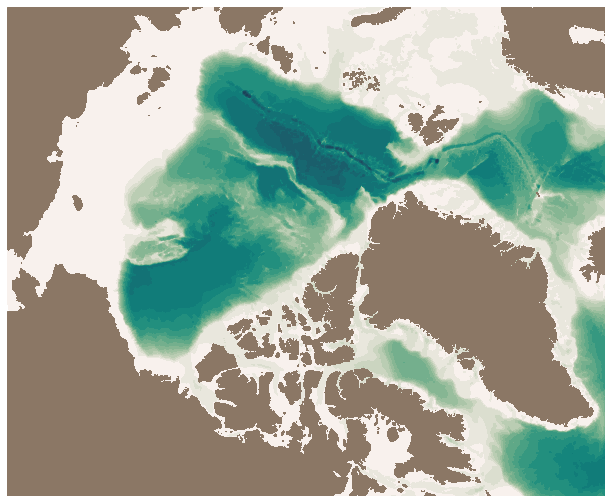

In [40]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1=Basemap(projection='stere',lat_0 = 84, lon_0 = -95, resolution='i', width=5.5e6, height=4.5e6, ax=ax1)
# proj1.drawparallels(np.arange(int(50),int(90),5),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
# proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p1 = Polygon([(0, 0),(0, 1.7e6),(0.9e6, 1.7e6),(0.9e6, 0)], facecolor="#8b7765",edgecolor="#8b7765") 
p2 = Polygon([(0, 3.6e6),(0, 4.5e6),(0.5e6, 4.5e6),(0.5e6, 3.6e6)], facecolor="#8b7765",edgecolor="#8b7765") 
p3 = Polygon([(0.5e6, 0),(0.5e6, 0.4e6),(2.5e6, 0.4e6),(2.5e6, 0)], facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p1)
plt.gca().add_patch(p2) 
plt.gca().add_patch(p3) 

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# ax2   = fig.add_axes([0.67, 0.56, 0.35, 0.35])
# proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
# proj2.drawmapboundary(fill_color='white')
# proj2.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/AO-map.pickle','wb'))

Mn reference:

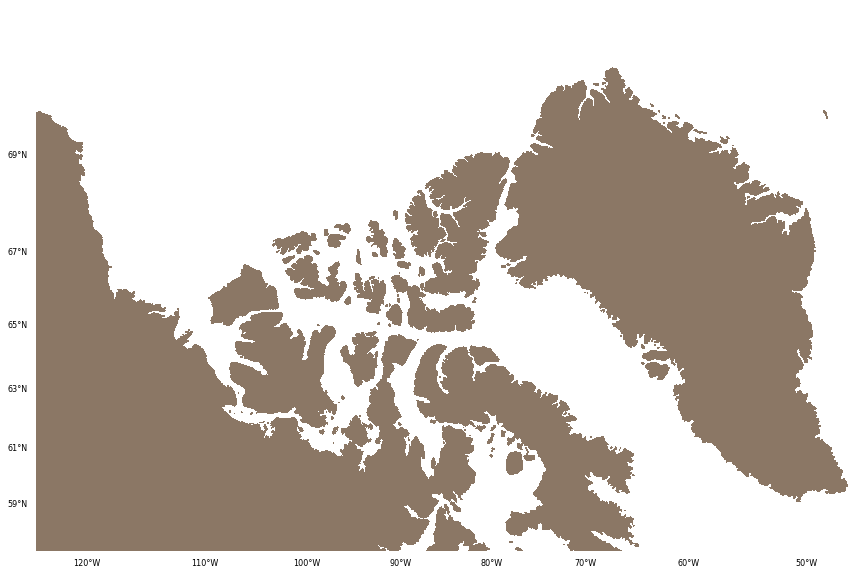

In [5]:
fig, ax1 = plt.subplots(figsize=(16,10))

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','wb'))

<IPython.core.display.Javascript object>


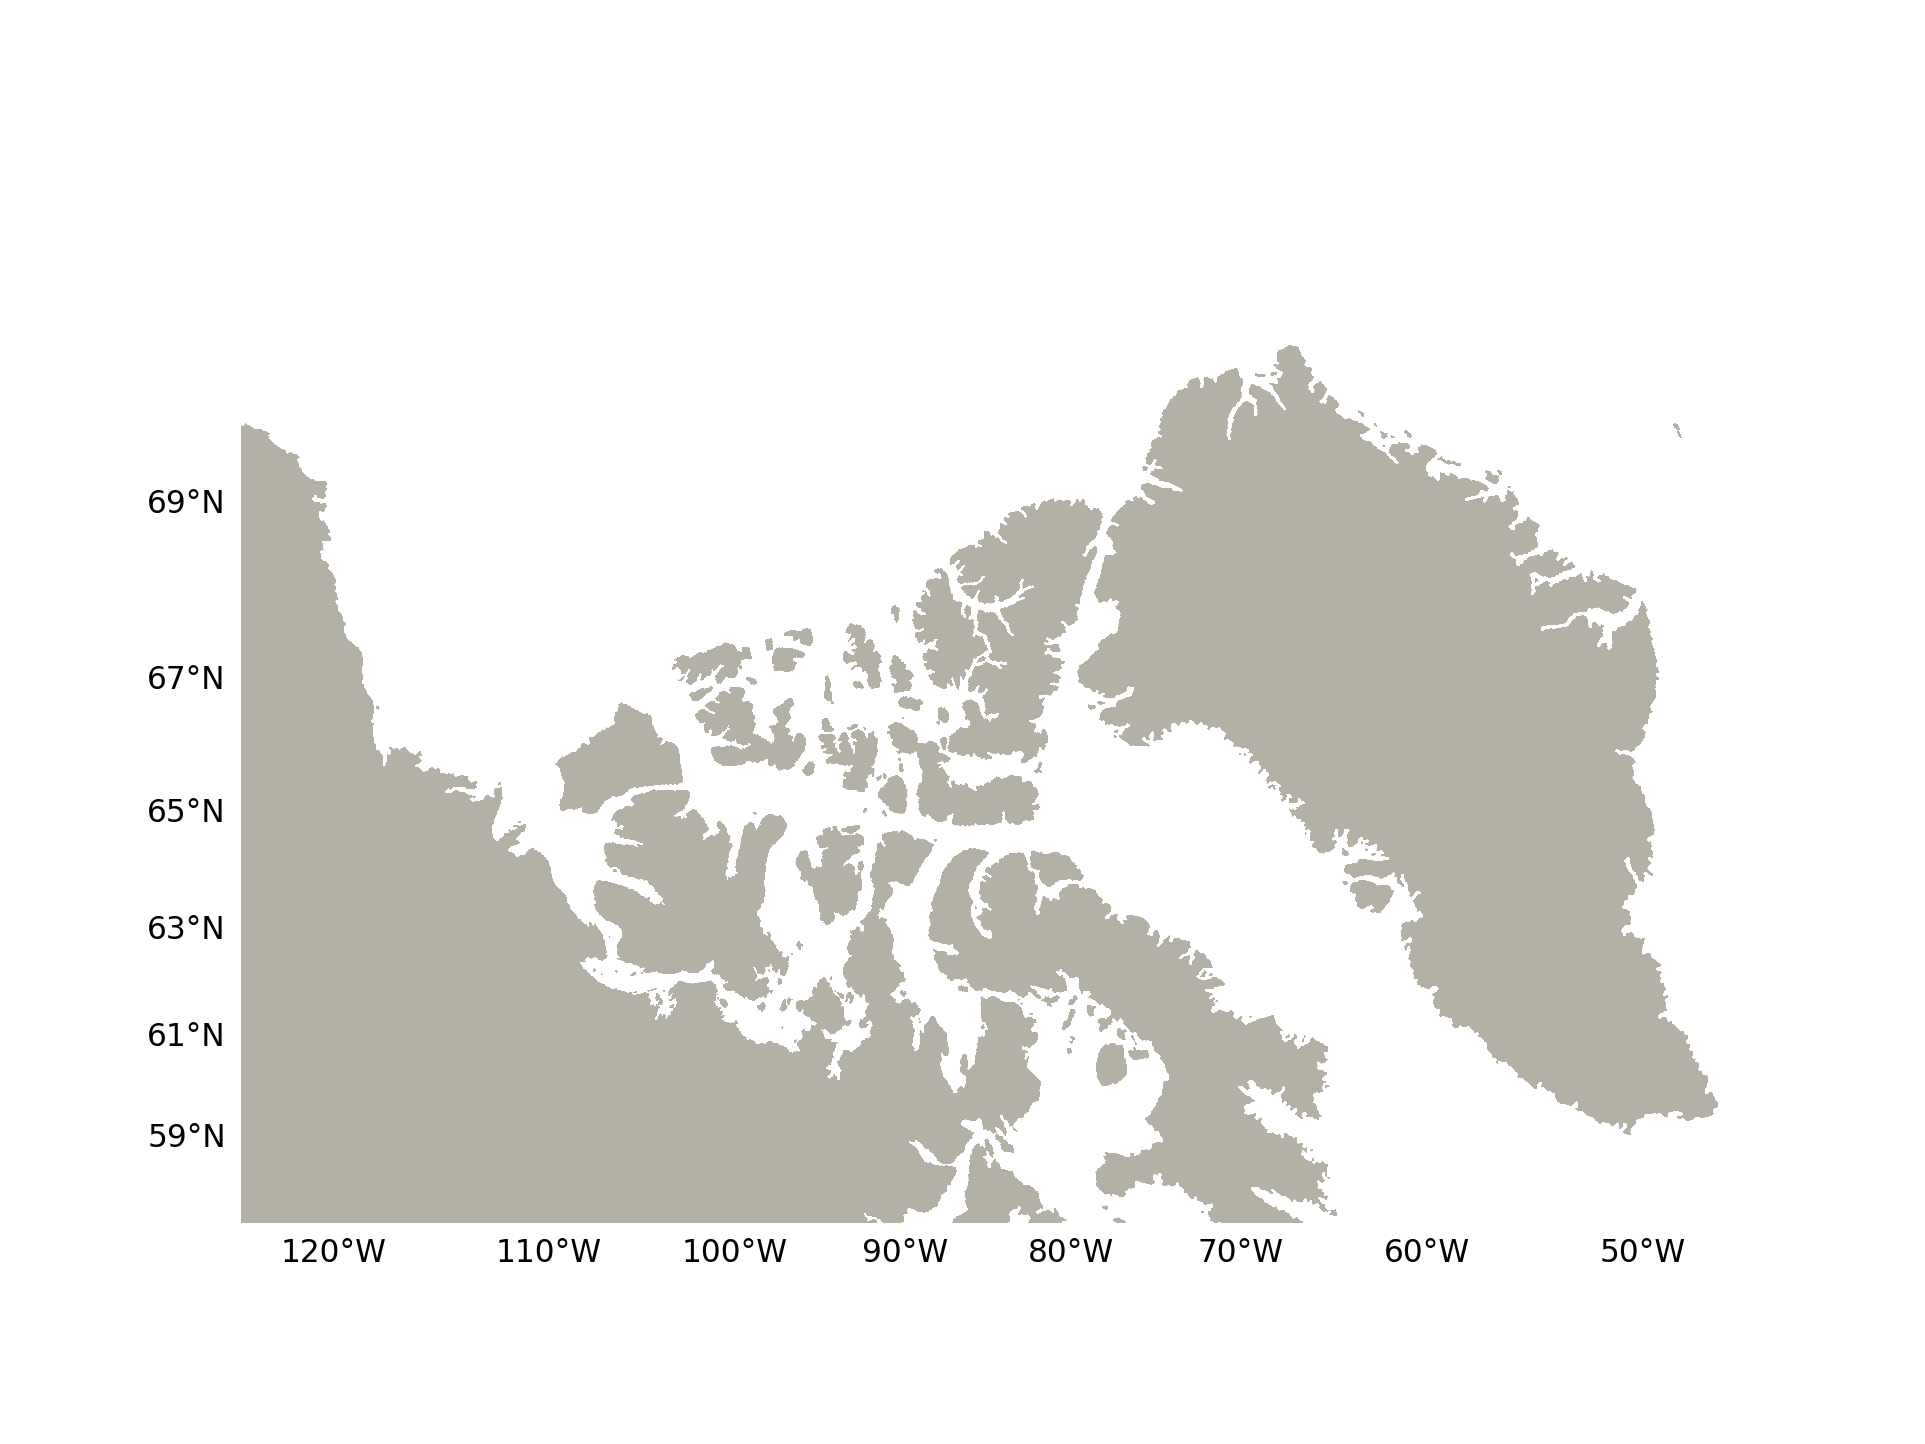

In [9]:
land_color = '#b3b0a5'

fig, ax1 = plt.subplots(figsize=(12,9))

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, \
               cmap=matplotlib.colors.ListedColormap([land_color]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor=land_color,edgecolor=land_color) 
plt.gca().add_patch(p) 

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-reference_gray.pickle','wb'))

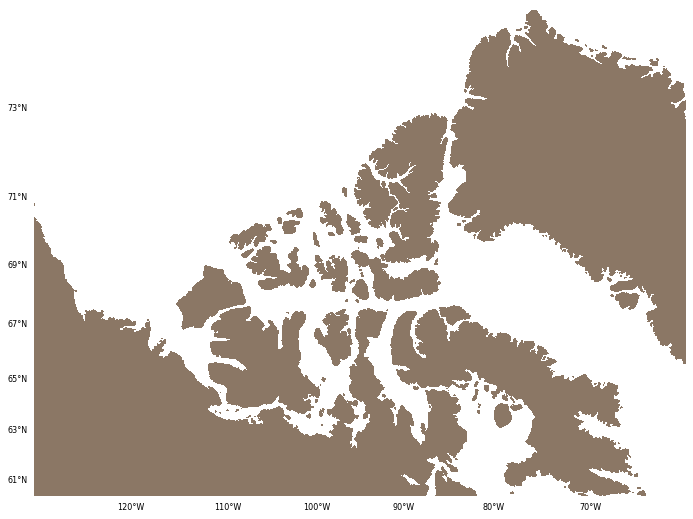

In [7]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1 = Basemap(projection='stere',lat_0 = 77.0, lon_0 = -95, resolution='i', width=3.6e6, height=2.7e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 400478),(1.427e6, 400478),(1.427e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-zoom.pickle','wb'))

<IPython.core.display.Javascript object>


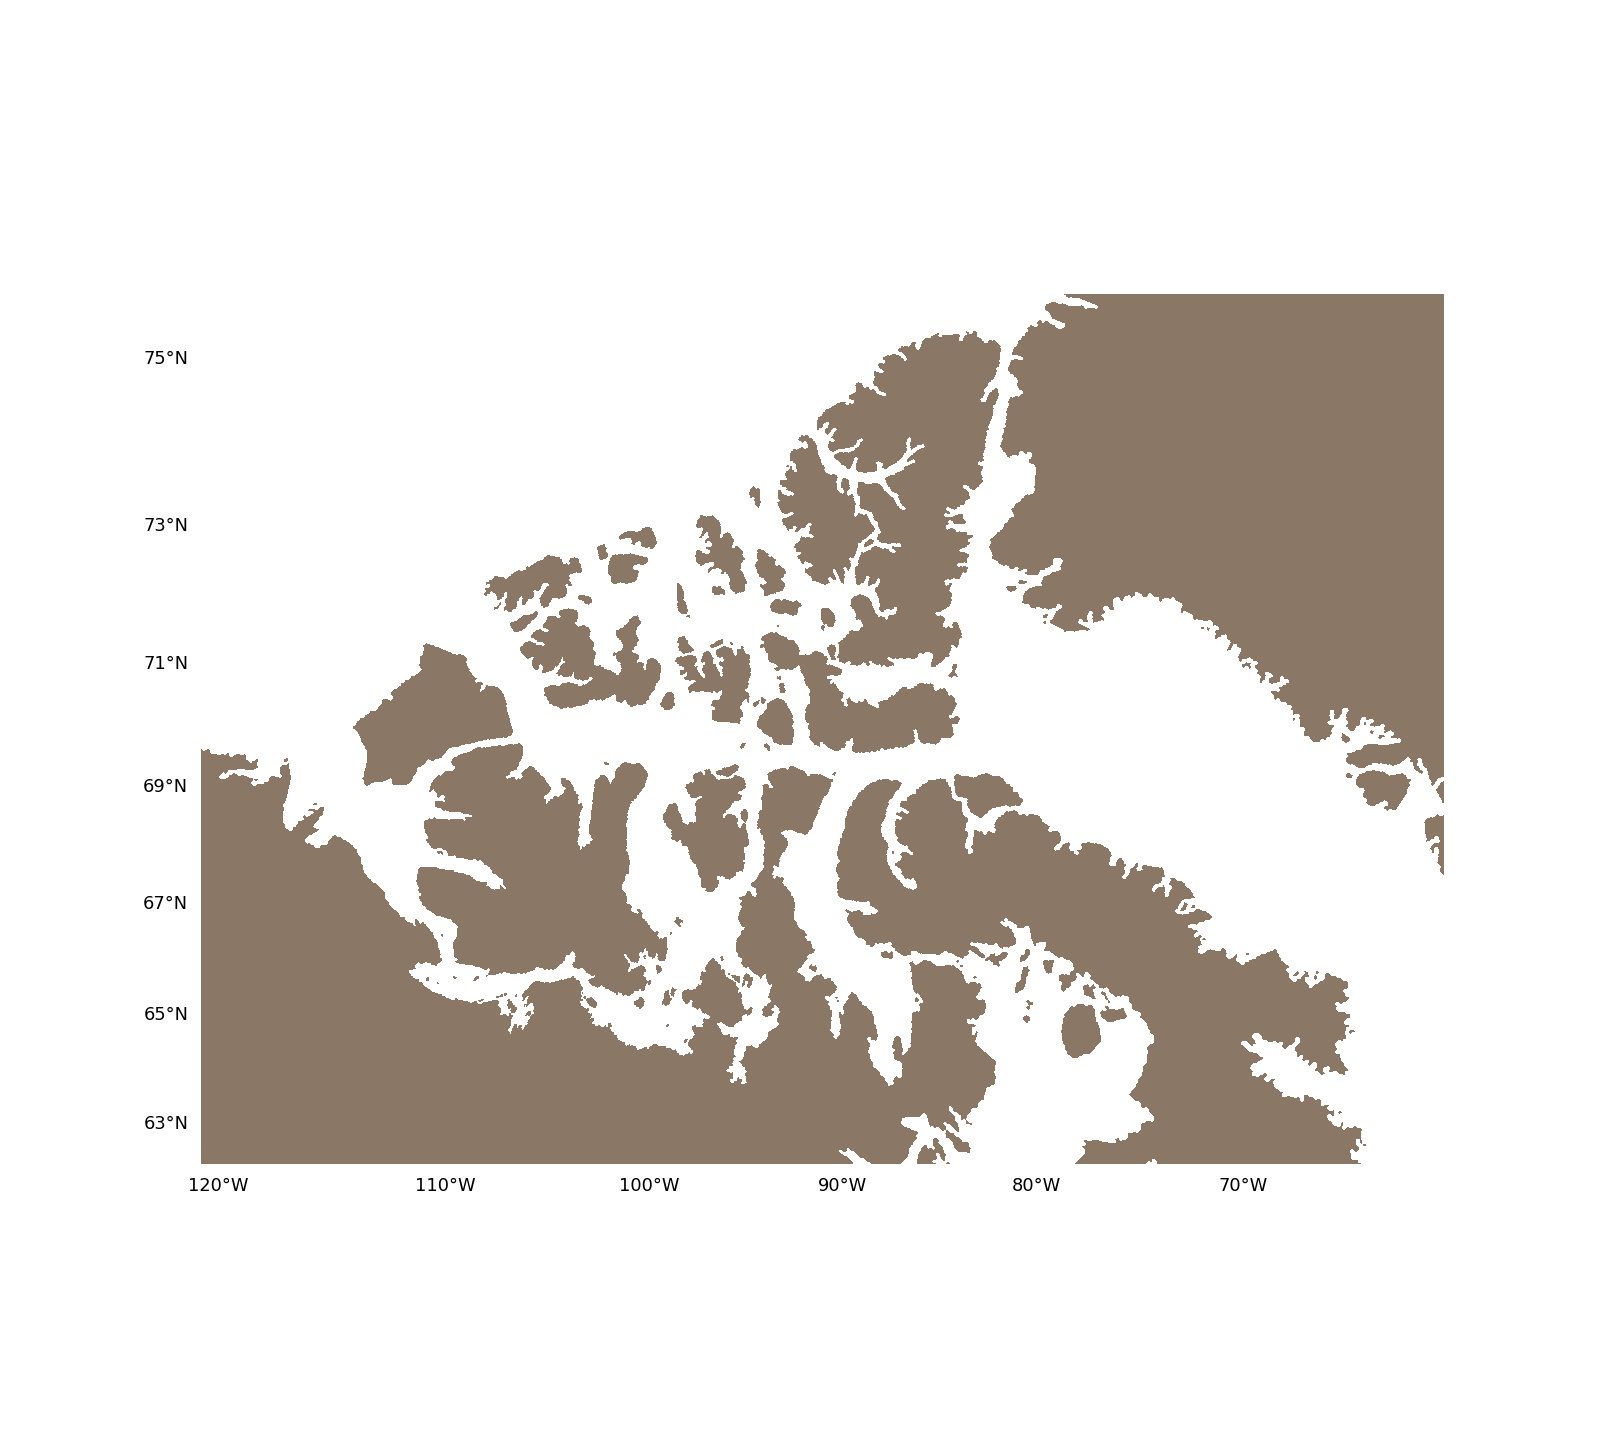

In [7]:
fig, ax1 = plt.subplots(figsize=(10,9))

proj1 = Basemap(projection='stere',lat_0 = 75, lon_0 = -91, resolution='i', width=3.0e6, height=2.1e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
p = Polygon([(0, 0),(0, 0.3e6),(1e6, 0.3e6),(1e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/caa.pickle','wb'))

<IPython.core.display.Javascript object>


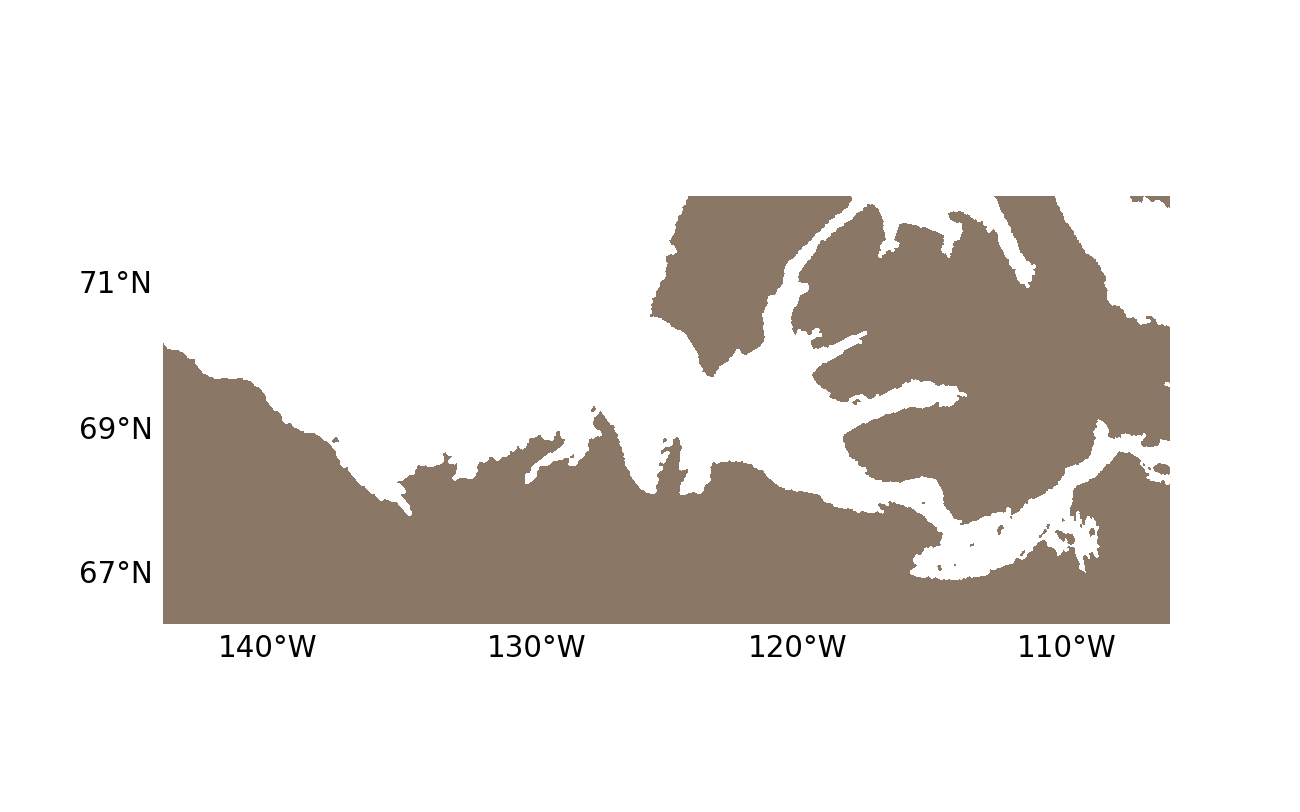

In [70]:
fig, ax1 = plt.subplots(figsize=(8,5))

proj1 = Basemap(projection='stere',lat_0 = 70.6, lon_0 = -125, resolution='h', width=1.65e6, height=0.70e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-170),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mackenzie-river.pickle','wb'))

<IPython.core.display.Javascript object>


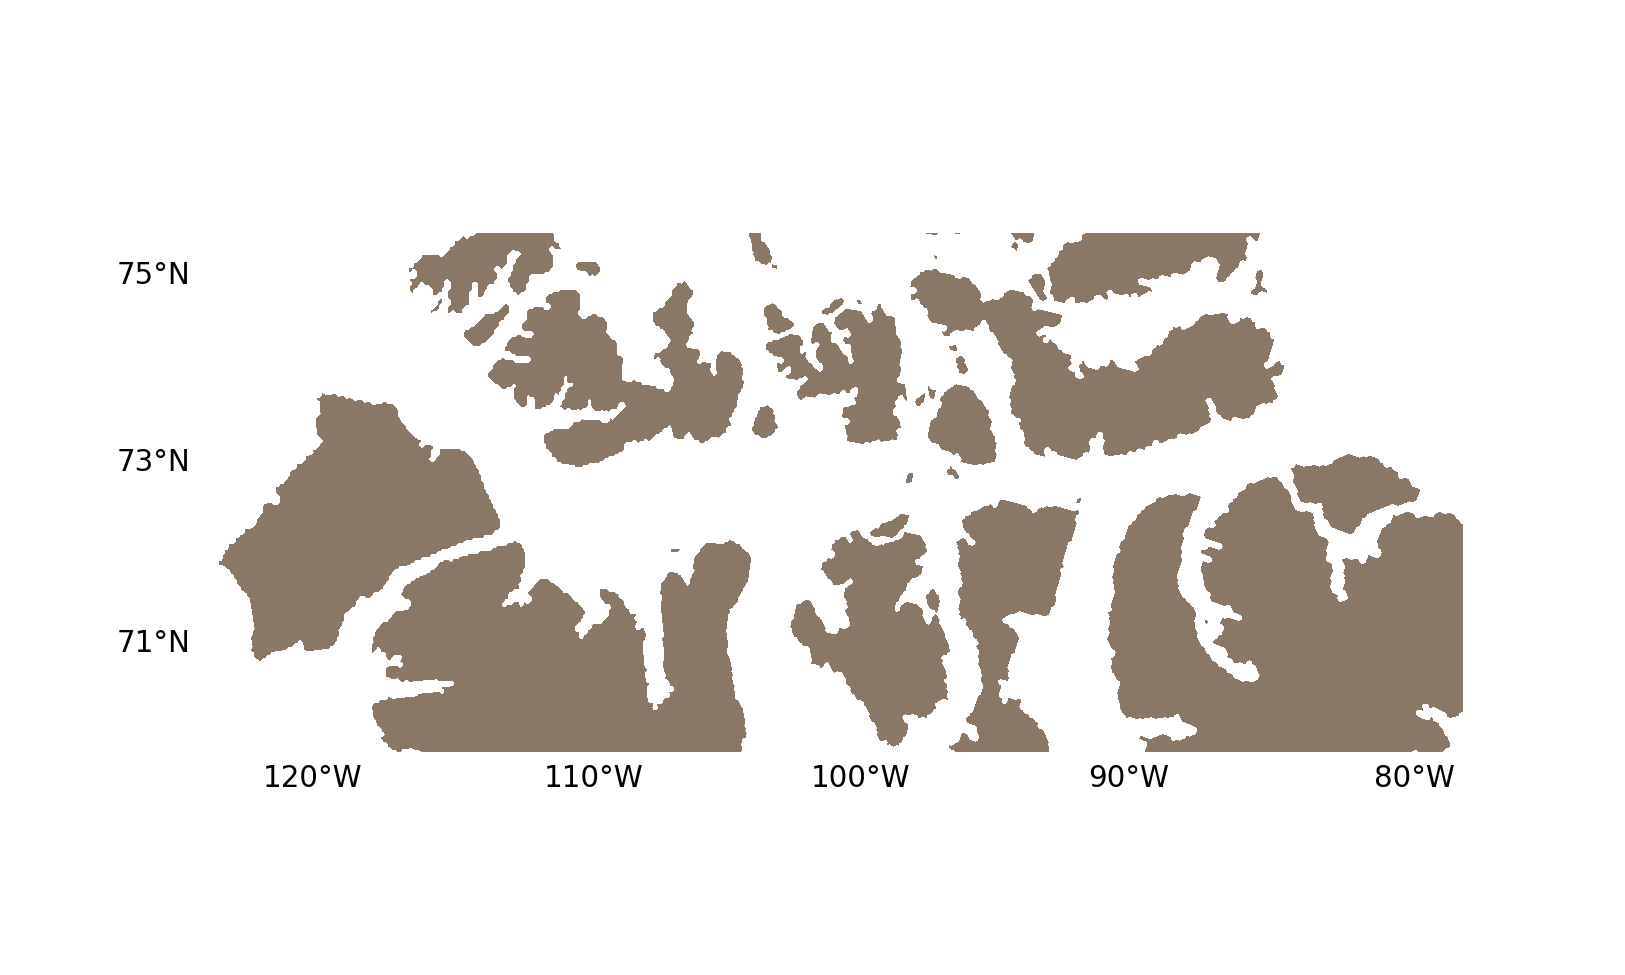

In [24]:
fig, ax1 = plt.subplots(figsize=(10,6))

proj1 = Basemap(projection='stere',lat_0 = 74.4, lon_0 = -101, resolution='h', width=1.7e6, height=0.7e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/parry-channel.pickle','wb'))

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6))

proj1 = Basemap(projection='stere',lat_0 = 74.8, lon_0 = -94, resolution='h', width=0.9e6, height=0.5e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/eastern-parry-channel.pickle','wb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


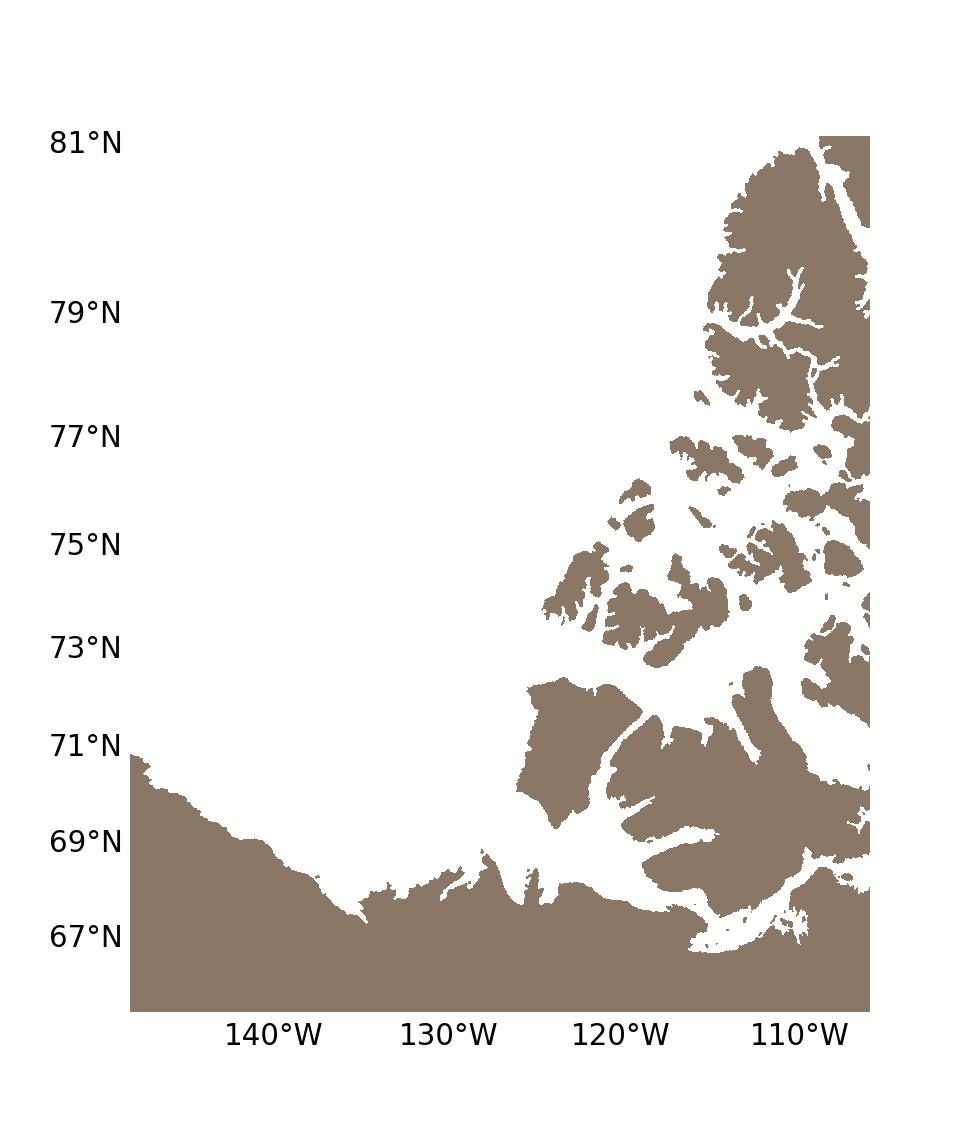

In [60]:
fig, ax1 = plt.subplots(figsize=(6,7))

proj1 = Basemap(projection='stere',lat_0 = 77.0, lon_0 = -127, resolution='h', width=1.9e6, height=2.25e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-160),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/canada-basin.pickle','wb'))

Many subplots:

<IPython.core.display.Javascript object>


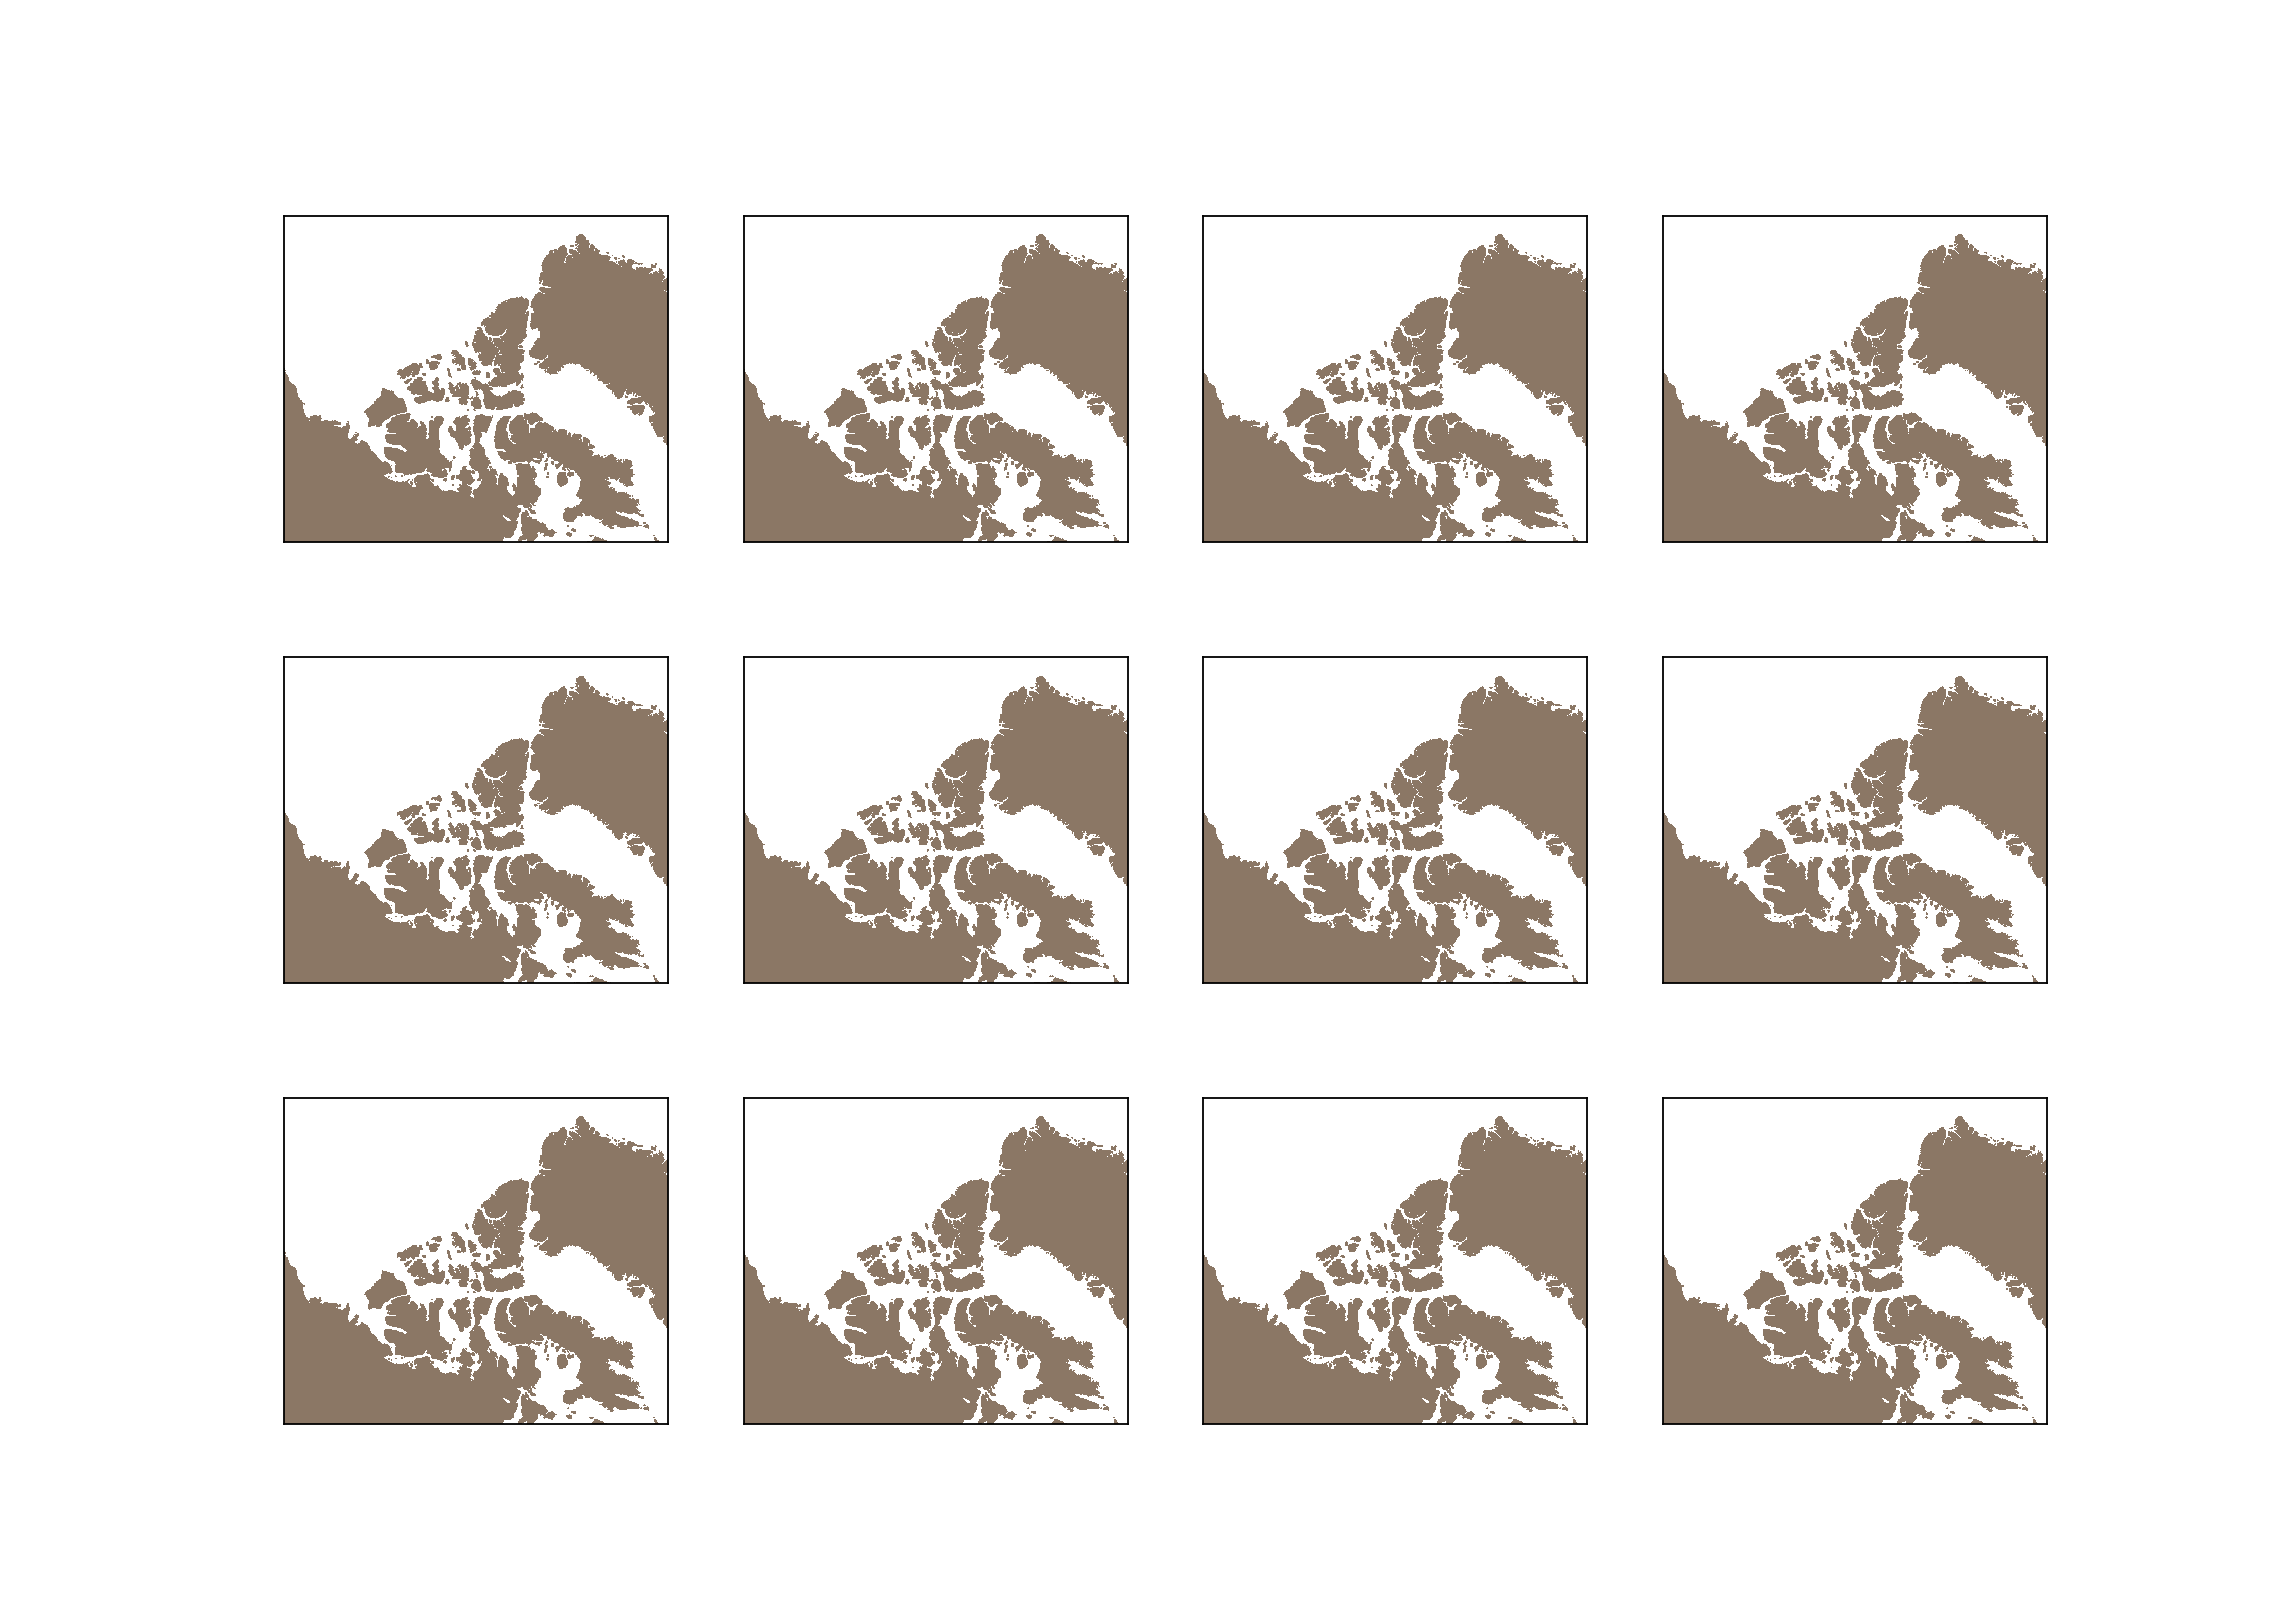

In [6]:
fig, ax = plt.subplots(3, 4, figsize=(14,10))

# plot 1 ---------------------------
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[0,0])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[0,1])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[0,2])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[0,3])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[1,0])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[1,1])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[1,2])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[1,3])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[2,0])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[2,1])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[2,2])
proj1=Basemap(projection='stere',lat_0 = 77.1, lon_0 = -95, resolution='i', width=3.5e6, height=2.98e6, ax=ax[2,3])

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,0])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,1])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,2])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[0,3])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,0])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,1])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,2])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[1,3])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,0])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,1])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,2])
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]),ax=ax[2,3])

p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765") 
ax[0,0].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,0].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,0].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[0,1].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,1].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,1].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[0,2].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,2].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,2].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[0,3].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[1,3].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")
ax[2,3].add_patch(p) 
p = Polygon([(1.44e6, 0),(1.44e6, 0.4e6),(905820, 0.4e6),(905820, 0)], facecolor="#8b7765",edgecolor="#8b7765")

# pickle the class instance.
pickle.dump((fig, ax, proj1),open('/ocean/brogalla/GEOTRACES/pickles/surface-Mn_subplots.pickle','wb'),-1)

Pb extended surface pickle:

<IPython.core.display.Javascript object>


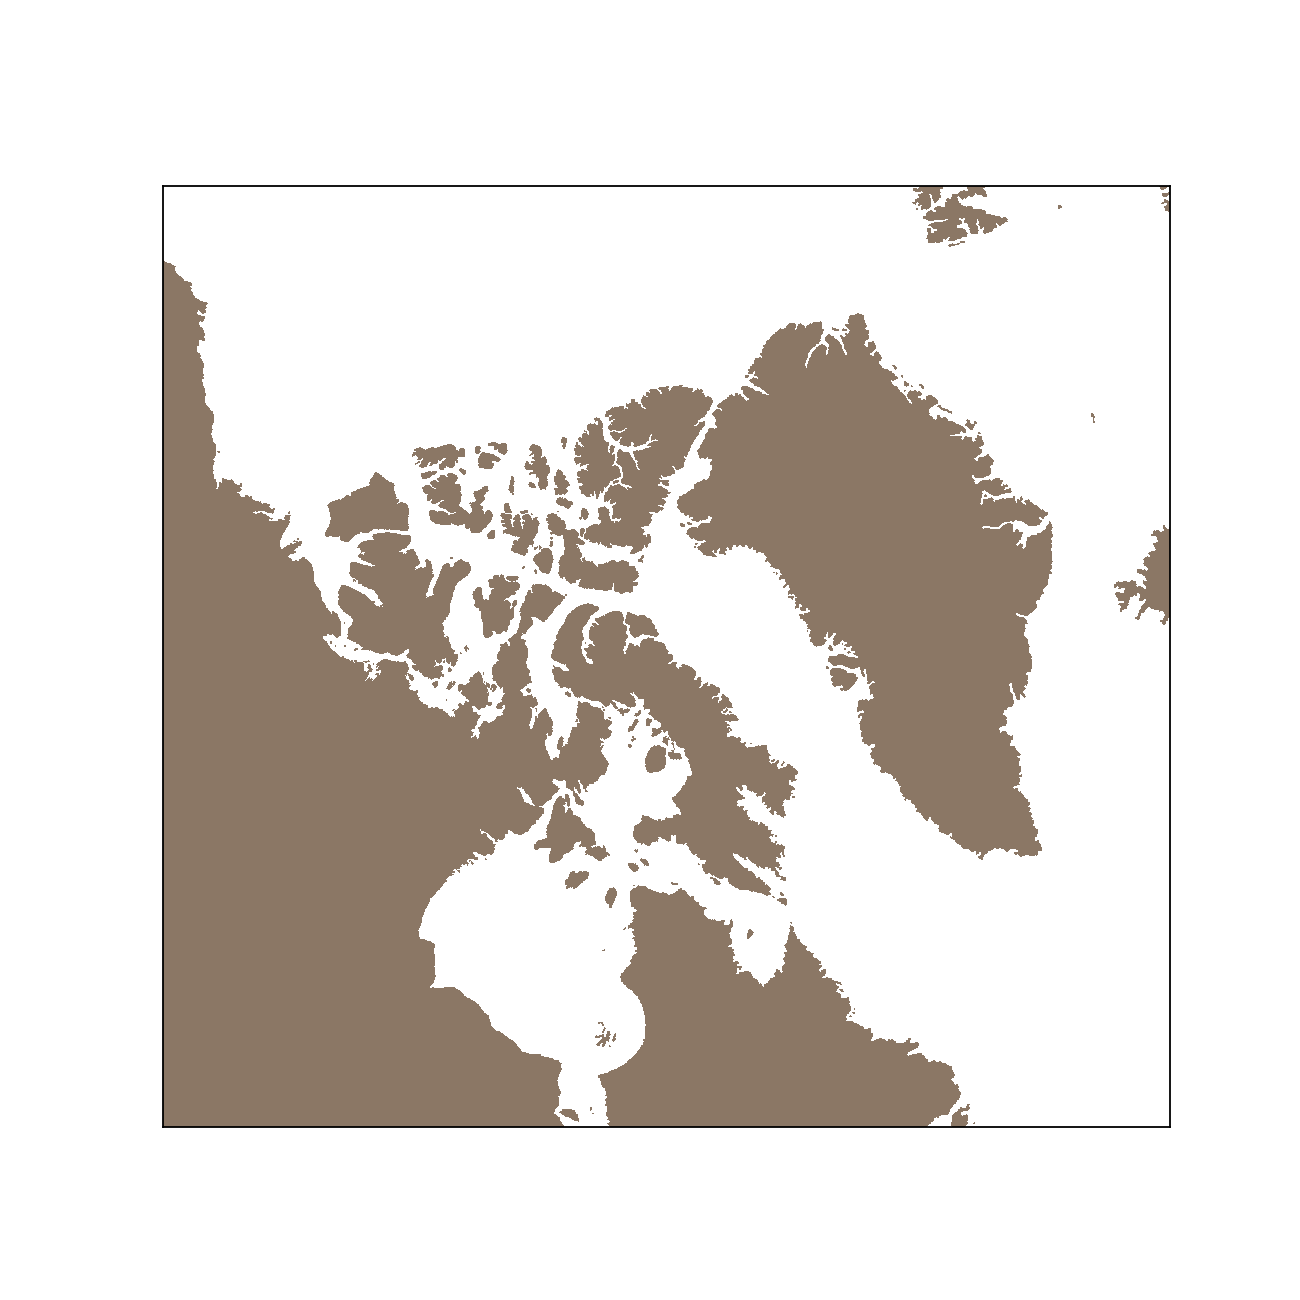

In [6]:
fig, ax1 = plt.subplots(figsize=(8,8))

proj1=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -75, resolution='i', width=4.6e6, height=4.3e6, ax=ax1)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

p = Polygon([(0,1.836e6),(986670, 1.885e6),(980955, 0),(0, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','wb'),-1)

<IPython.core.display.Javascript object>


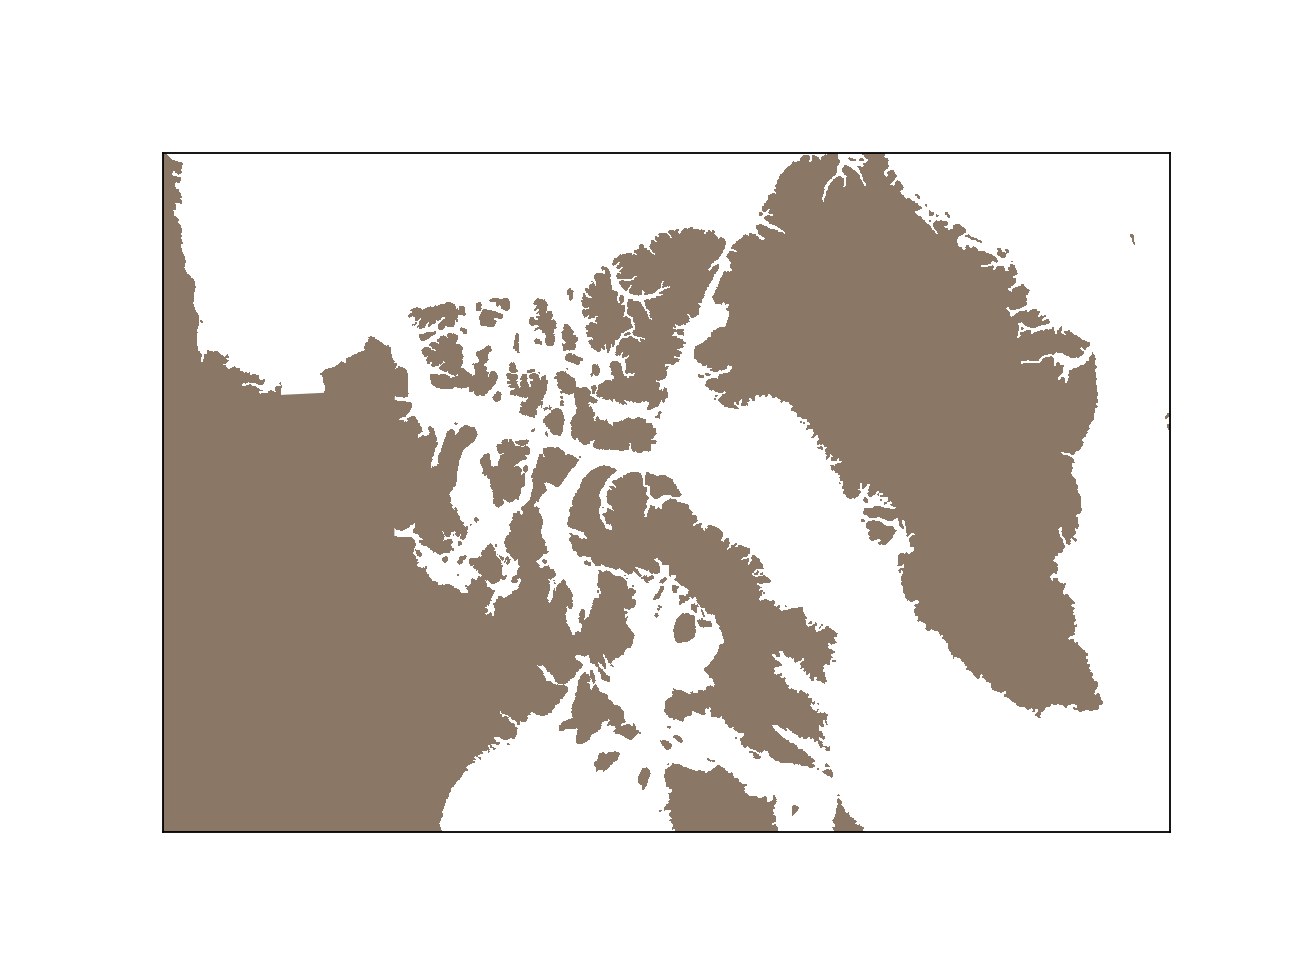

In [12]:
fig, ax1 = plt.subplots(figsize=(8,6))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=4.3e6, height=2.9e6, ax=ax1)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

p = Polygon([(0,1.836e6),(986670, 1.885e6),(980955, 0),(0, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765") 
plt.gca().add_patch(p) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/eval-Pb.pickle','wb'),-1)

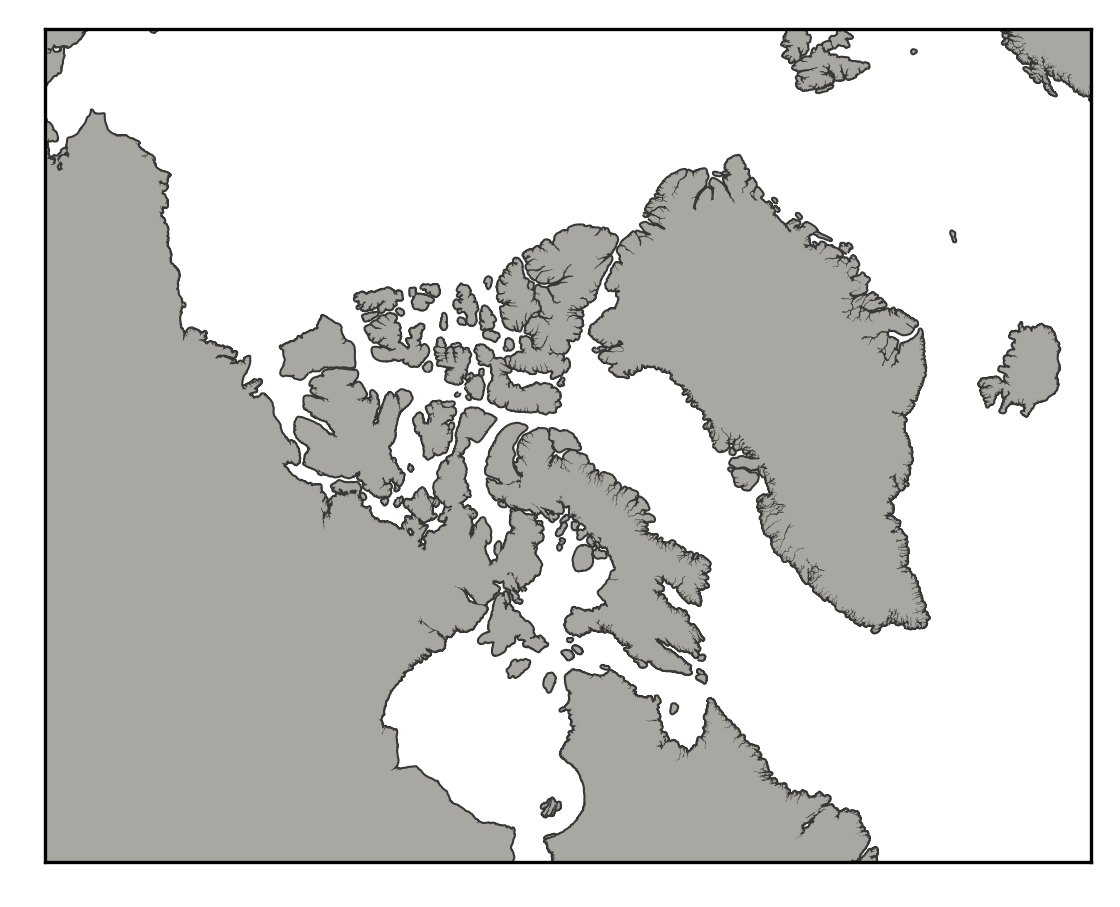

In [7]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
# proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
# proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=7)
# proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=7)

land_color = '#a9a7a2'
proj1.drawcoastlines(color='#373736', linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','wb'))

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,10))

land_color = '#a9a7a2'
proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color='#373736', linewidth=1.8);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','wb'))

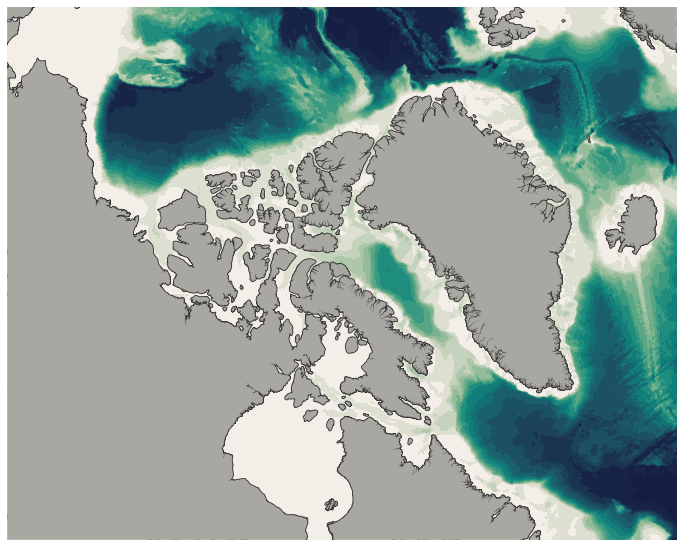

In [9]:
fig, ax1 = plt.subplots(figsize=(12,10))

land_color = '#a9a7a2'
proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color='#373736', linewidth=1.8);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

x_model, y_model = proj1(lon, lat)
# proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
# p = Polygon([(0, 0),(0, 2.0e6),(1.3e6, 2.0e6),(1.3e6, 0)], \
#             facecolor="#8b7765",edgecolor="#8b7765") 
# plt.gca().add_patch(p) 
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=4000, zorder=1)

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/pb-bathy.pickle','wb'))

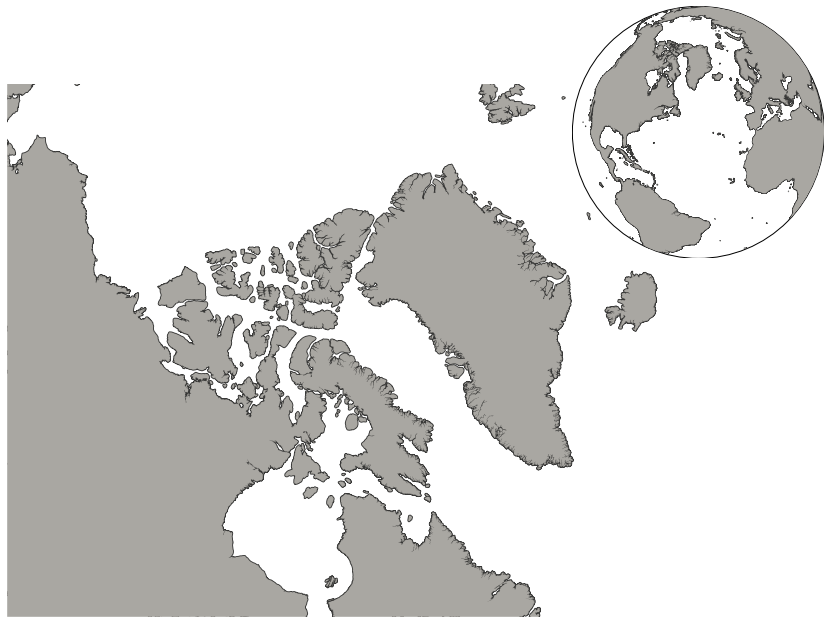

In [9]:
fig, ax1 = plt.subplots(figsize=(12,10))

land_color = '#a9a7a2'
proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color='#373736', linewidth=1.8);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

ax1.set_frame_on(False)

ax2   = fig.add_axes([0.75, 0.63, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawcoastlines(color='#373736', linewidth=1.3);
proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/pb-surface-globe.pickle','wb'))

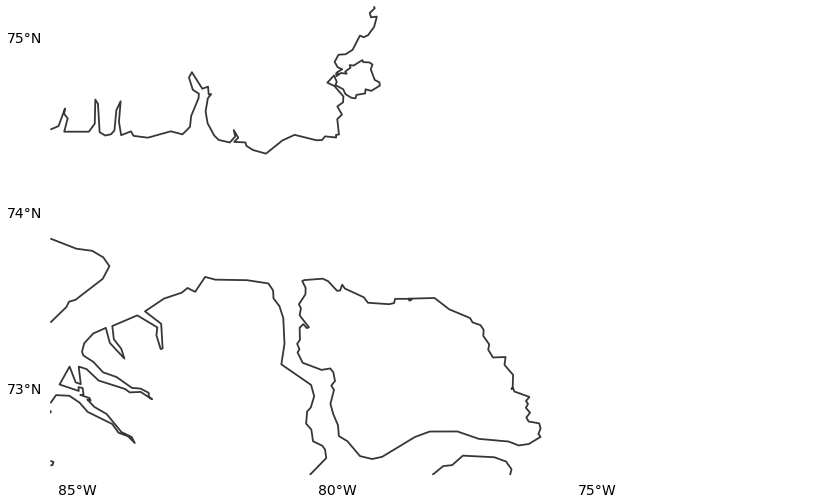

In [19]:
fig, ax1 = plt.subplots(figsize=(14,11))

proj1 = Basemap(projection='stere',lat_0 = 74, lon_0 = -78, resolution='i', width=5e5, height=3e5, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),1),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

land_color = '#a9a7a2'

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
# proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

ax1.set_frame_on(False)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/lancaster-zoom-noland.pickle','wb'))

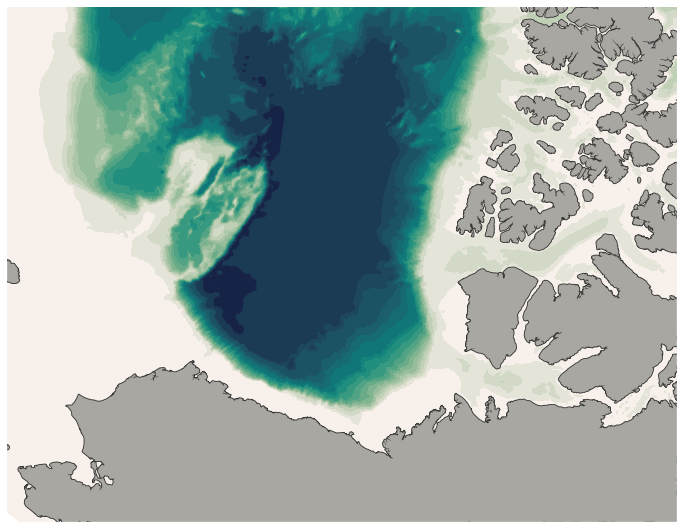

In [14]:
fig, ax1 = plt.subplots(figsize=(12,10))

land_color = '#a9a7a2'
proj1=Basemap(projection='eqdc',lat_0 = 75.5, lon_0 = -140, resolution='i', width=2.6e6, height=2.0e6, ax=ax1)
proj1.drawcoastlines(color='#373736', linewidth=1.8);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=4000, zorder=1)

ax1.set_frame_on(False)
# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/tracks-CB.pickle','wb'))